# COVID-19 Analysis Dashboard

## What is COVID-19?

> Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1
'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

>The tables and graphs throughout this notebook have been adapted from: Yanchang Zhao, COVID-19 Data Analysis with R – Worldwide. RDataMining.com, 2020. URL: http:
//www.rdatamining.com/docs/Coronavirus-data-analysis-world.pdf.
![Coronavirus particle Image](https://www.apta.com/wp-content/uploads/home-banner-1.jpg)

In [1]:
#create a local folder for the local files to live in
#[Creates a folder call "R" in your CloudStor home]
dir.create('/scratch/R', showWarnings = FALSE)
#add the local folder to R's
.libPaths(new='/scratch/R')
#install a package (zip) locally
install.packages("leaflet", lib="/scratch/R")
install.packages("gridExtra", lib="/scratch/R")
install.packages("ggforce", lib="/scratch/R")
install.packages("kableExtra", lib="/scratch/R")
#import the lib (zip)
library(leaflet, lib="/scratch/R")
library(gridExtra, lib="/scratch/R")
library(ggforce, lib="/scratch/R")
library(kableExtra, lib="/scratch/R")

also installing the dependencies ‘gridExtra’, ‘crosstalk’, ‘png’, ‘raster’, ‘viridis’, ‘leaflet.providers’


also installing the dependencies ‘farver’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’


also installing the dependency ‘webshot’


Loading required package: ggplot2



In [2]:
library(magrittr) # pipe operations
library(lubridate) # date operations
library(tidyverse) # ggplot2, tidyr, dplyr...
library(gridExtra) # multiple grid-based plots on a page
library(ggforce) # accelerating ggplot2
library(kableExtra) # complex tables
library(leaflet) # map


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks base::date()
✖ tidyr::extract()         masks magrittr::extract()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::group_rows()      masks kableExtra::group_rows()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ purrr::set_names()       masks magrittr::set_names()
✖ lubridate::union()       masks base::union()



## 1. Load Data into R

In [3]:
raw.data.confirmed <- read.csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
raw.data.deaths <- read.csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
raw.data.recovered <- read.csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
dim(raw.data.confirmed)


[1] 266 151

Each dataset has 266 rows, corresponding to country/region/province/state. It has 151 columns. Starting from column 5, each column corresponds to a single day.

## 2. Preview the Data

In [4]:
raw.data.confirmed

Province.State                   Country.Region         Lat       
1                                    Afghanistan             33.0000  
2                                    Albania                 41.1533  
3                                    Algeria                 28.0339  
4                                    Andorra                 42.5063  
5                                    Angola                 -11.2027  
6                                    Antigua and Barbuda     17.0608  
7                                    Argentina              -38.4161  
8                                    Armenia                 40.0691  
9   Australian Capital Territory     Australia              -35.4735  
10  New South Wales                  Australia              -33.8688  
11  Northern Territory               Australia              -12.4634  
12  Queensland                       Australia              -28.0167  
13  South Australia                  Australia              -34.9285  
14  Tasmania                         Australia              -41.4545  
15  Victoria                         Australia              -37.8136  
16  Western Australia                Australia              -31.9505  
17                                   Austria                 47.5162  
18                                   Azerbaijan              40.1431  
19                                   Bahamas                 25.0343  
20                                   Bahrain                 26.0275  
21                                   Bangladesh              23.6850  
22                                   Barbados                13.1939  
23                                   Belarus                 53.7098  
24                                   Belgium                 50.8333  
25                                   Benin                    9.3077  
26                                   Bhutan                  27.5142  
27                                   Bolivia                -16.2902  
28                                   Bosnia and Herzegovina  43.9159  
29                                   Brazil                 -14.2350  
30                                   Brunei                   4.5353  
⋮   ⋮                                ⋮                      ⋮         
237                                  Timor-Leste             -8.874217
238                                  Belize                  13.193900
239                                  Laos                    19.856270
240                                  Libya                   26.335100
241                                  West Bank and Gaza      31.952200
242                                  Guinea-Bissau           11.803700
243                                  Mali                    17.570692
244                                  Saint Kitts and Nevis   17.357822
245 Northwest Territories            Canada                  64.825500
246 Yukon                            Canada                  64.282300
247                                  Kosovo                  42.602636
248                                  Burma                   21.916200
249 Anguilla                         United Kingdom          18.220600
250 British Virgin Islands           United Kingdom          18.420700
251 Turks and Caicos Islands         United Kingdom          21.694000
252                                  MS Zaandam               0.000000
253                                  Botswana               -22.328500
254                                  Burundi                 -3.373100
255                                  Sierra Leone             8.460555
256 Bonaire, Sint Eustatius and Saba Netherlands             12.178400
257                                  Malawi                 -13.254308
258 Falkland Islands (Malvinas)      United Kingdom         -51.796300
259 Saint Pierre and Miquelon        France                  46.885200
260                                  South Sudan              6.877000
261                         

In [5]:
n.col <- ncol(raw.data.confirmed)
## get dates from column names
dates <- names(raw.data.confirmed)[5:n.col] %>% substr(2,8) %>% mdy()
range(dates)


[1] "2020-01-22" "2020-06-16"

Above we check the date range of the data

In [6]:
## set up date functions
min.date <- min(dates)
max.date <- max(dates)
min.date.txt <- min.date %>% format('%d %b %Y')
max.date.txt <- max.date %>% format('%d %b %Y') %>% paste('UTC')

## set up graph size
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)}

## 3. Data Preparation
> 3.1 Data Cleaning - 
The three datesets are converted from wide to long format and then are aggregated by country. After that,
they are merged into one single dataset.

In [7]:
## data cleaning and transformation
cleanData <- function(data) {
## remove some columns
data %<>% select(-c(Province.State, Lat, Long)) %>% rename(country=Country.Region)
## convert from wide to long format
data %<>% gather(key=date, value=count, -country)
## convert from character to date
data %<>% mutate(date = date %>% substr(2,8) %>% mdy())
## aggregate by country
data %<>% group_by(country, date) %>% summarise(count=sum(count, na.rm=T)) %>% as.data.frame()
return(data)
}
## clean the three datasets
data.confirmed <- raw.data.confirmed %>% cleanData() %>% rename(confirmed=count)
data.deaths <- raw.data.deaths %>% cleanData() %>% rename(deaths=count)
data.recovered <- raw.data.recovered %>% cleanData() %>% rename(recovered=count)
## merge above 3 datasets into one, by country and date
data <- data.confirmed %>% merge(data.deaths, all=T) %>% merge(data.recovered, all=T)
data %<>% mutate(recovered = ifelse(is.na(recovered), lag(recovered, 1), recovered))
## countries/regions with confirmed cases, excl. cruise ships
countries <- data %>% pull(country) %>% setdiff('Cruise Ship')
# ## first 10 records when it first broke out in China
data %>% filter(country=='China') %>% head(10) 
# ## most recent 10 records in Australia
data %>% filter(country=='Australia') %>% tail(10) 


country date       confirmed deaths recovered
1  China   2020-01-22  548       17     28      
2  China   2020-01-23  643       18     30      
3  China   2020-01-24  920       26     36      
4  China   2020-01-25 1406       42     39      
5  China   2020-01-26 2075       56     49      
6  China   2020-01-27 2877       82     58      
7  China   2020-01-28 5509      131    101      
8  China   2020-01-29 6087      133    120      
9  China   2020-01-30 8141      171    135      
10 China   2020-01-31 9802      213    214

country   date       confirmed deaths recovered
138 Australia 2020-06-07 7265      102    6706     
139 Australia 2020-06-08 7267      102    6720     
140 Australia 2020-06-09 7274      102    6740     
141 Australia 2020-06-10 7285      102    6759     
142 Australia 2020-06-11 7289      102    6782     
143 Australia 2020-06-12 7294      102    6803     
144 Australia 2020-06-13 7320      102    6838     
145 Australia 2020-06-14 7335      102    6851     
146 Australia 2020-06-15 7347      102    6856     
147 Australia 2020-06-16 7370      102    6861

> 3.2 Worldwide Cases - 
The raw data provide the daily number of cases in every country. They are aggregated below to derive the
daily stats of the whole world.

In [8]:
## counts for the whole world
data.world <- data %>% group_by(date) %>%
summarise(country='World',
confirmed = sum(confirmed, na.rm=T),
deaths = sum(deaths, na.rm=T),
recovered = sum(recovered, na.rm=T))

data %<>% rbind(data.world)

# ## current confirmed cases
data %<>% mutate(current.confirmed = confirmed - deaths - recovered)

data

country     date       confirmed deaths recovered current.confirmed
1     Afghanistan 2020-01-22 0         0      0         0                
2     Afghanistan 2020-01-23 0         0      0         0                
3     Afghanistan 2020-01-24 0         0      0         0                
4     Afghanistan 2020-01-25 0         0      0         0                
5     Afghanistan 2020-01-26 0         0      0         0                
6     Afghanistan 2020-01-27 0         0      0         0                
7     Afghanistan 2020-01-28 0         0      0         0                
8     Afghanistan 2020-01-29 0         0      0         0                
9     Afghanistan 2020-01-30 0         0      0         0                
10    Afghanistan 2020-01-31 0         0      0         0                
11    Afghanistan 2020-02-01 0         0      0         0                
12    Afghanistan 2020-02-02 0         0      0         0                
13    Afghanistan 2020-02-03 0         0      0         0                
14    Afghanistan 2020-02-04 0         0      0         0                
15    Afghanistan 2020-02-05 0         0      0         0                
16    Afghanistan 2020-02-06 0         0      0         0                
17    Afghanistan 2020-02-07 0         0      0         0                
18    Afghanistan 2020-02-08 0         0      0         0                
19    Afghanistan 2020-02-09 0         0      0         0                
20    Afghanistan 2020-02-10 0         0      0         0                
21    Afghanistan 2020-02-11 0         0      0         0                
22    Afghanistan 2020-02-12 0         0      0         0                
23    Afghanistan 2020-02-13 0         0      0         0                
24    Afghanistan 2020-02-14 0         0      0         0                
25    Afghanistan 2020-02-15 0         0      0         0                
26    Afghanistan 2020-02-16 0         0      0         0                
27    Afghanistan 2020-02-17 0         0      0         0                
28    Afghanistan 2020-02-18 0         0      0         0                
29    Afghanistan 2020-02-19 0         0      0         0                
30    Afghanistan 2020-02-20 0         0      0         0                
⋮     ⋮           ⋮          ⋮         ⋮      ⋮         ⋮                
27754 World       2020-05-18 4810315   318853 1782471   2708991          
27755 World       2020-05-19 4906193   323662 1834636   2747895          
27756 World       2020-05-20 5005761   328483 1893549   2783729          
27757 World       2020-05-21 5112366   333292 1944814   2834260          
27758 World       2020-05-22 5220585   338585 2053465   2828535          
27759 World       2020-05-23 5321022   342565 2108436   2870021          
27760 World       2020-05-24 5417354   345412 2163876   2908066          
27761 World       2020-05-25 5504324   346583 2227599   2930142          
27762 World       2020-05-26 5599216   350807 2282813   2965596          
27763 World       2020-05-27 5702113   355990 2346206   2999917          
27764 World       2020-05-28 5820253   360686 2413063   3046504          
27765 World       2020-05-29 5941938   365380 2490390   3086168          
27766 World       2020-05-30 6070884   369492 2560862   3140530          
27767 World       2020-05-31 6178860   372373 2637170   3169317          
27768 World       2020-06-01 6275246   375902 2692065   3207279          
27769 World       2020-06-02 6387849   380599 2796188   3211062          
27770 World       2020-06-03 6519164   386298 2875330   3257536          
27771 World       2020-06-04 6642853   391472 2945359   3306022          
27772 World       2020-06-05 6776126   396294 3014515   3365317          
27773 World       2020-06-06 6902650   400107 3086717   3415826          
27774 World       2020-06-07 7015739   402856 3141810   3471073          
27775 World       2020-06-08 7119355   406600 3293408   3419347          
27776 Worl

> 3.3 Daily Increases and Death Rates - 
After that, the daily increases of death and recovered cases and the death rates are calculated.

In [9]:
## sort by country and date
data %<>% arrange(country, date)
## daily increases of deaths and recovered cases
## set NA to the increases on day1
n <- nrow(data)
day1 <- min(data$date)
data %<>% mutate(new.confirmed = ifelse(date == day1, NA, confirmed - lag(confirmed, n=1)),
new.deaths = ifelse(date == day1, NA, deaths - lag(deaths, n=1)),
new.recovered = ifelse(date == day1, NA, recovered - lag(recovered, n=1)))
## change negative number of new cases to zero
data %<>% mutate(new.confirmed = ifelse(new.confirmed < 0, 0, new.confirmed),
new.deaths = ifelse(new.deaths < 0, 0, new.deaths),
new.recovered = ifelse(new.recovered < 0, 0, new.recovered))
## death rate based on total deaths and recovered cases
data %<>% mutate(rate.upper = (100 * deaths / (deaths + recovered)) %>% round(1))
## lower bound: death rate based on total confirmed cases
data %<>% mutate(rate.lower = (100 * deaths / confirmed) %>% round(1))
## death rate based on the number of death/recovered on every single day
data %<>% mutate(rate.daily = (100 * new.deaths / (new.deaths + new.recovered)) %>% round(1))
## convert from wide to long format, for drawing area plots
data.long <- data %>%
select(c(country, date, confirmed, current.confirmed, recovered, deaths)) %>%
gather(key=type, value=count, -c(country, date))
## set factor levels to show them in a desirable order
data.long %<>% mutate(type=recode_factor(type, confirmed='Total Confirmed',
current.confirmed='Current Confirmed',
recovered='Recovered',
deaths='Deaths'))
## convert from wide to long format, for drawing area plots
rates.long <- data %>%
# filter(country %in% top.countries) %>%
select(c(country, date, rate.upper, rate.lower, rate.daily)) %>%
# mutate(country=factor(country, levels=top.countries)) %>%
gather(key=type, value=count, -c(country, date))
# set factor levels to show them in a desirable order
rates.long %<>% mutate(type=recode_factor(type, rate.daily='Daily',
rate.lower='Lower bound',
rate.upper='Upper bound'))



## 4. Worldwide Cases
After tidying up the data, we visualise it with various charts.
> 4.1 World Map - 
Below is a world map of confirmed cases. 


In [41]:
## select last column, which is the number of latest confirmed cases
x <- raw.data.confirmed
x$confirmed <- x[, ncol(x)]
x %<>% select(c(Country.Region, Province.State, Lat, Long, confirmed)) %>%
mutate(txt=paste0(Country.Region, ' - ', Province.State, ': ', confirmed))
m <- leaflet(width=1200, height=900) %>% addTiles()
# circle marker (units in pixels)
m %<>% addCircleMarkers(x$Long, x$Lat,
radius=2+log2(x$confirmed), stroke=F,
color='red', fillOpacity=0.3,
popup=x$txt)
# world
m


HTML widgets cannot be represented in plain text (need html)

View specific countries below

In [ ]:
## Europe
m %>% setView(10, 50, zoom=4)

In [ ]:
## Australia and New Zealand
m %>% setView(135, -27, zoom=4)

In [ ]:
## China
m %>% setView(95, 35, zoom=4)

> 4.2 Number of Cases - 
In the rest of this section, we will focuse on the cases worldwide. Similar analysis for a single country can be
done by filter the data with the corresponding country name.


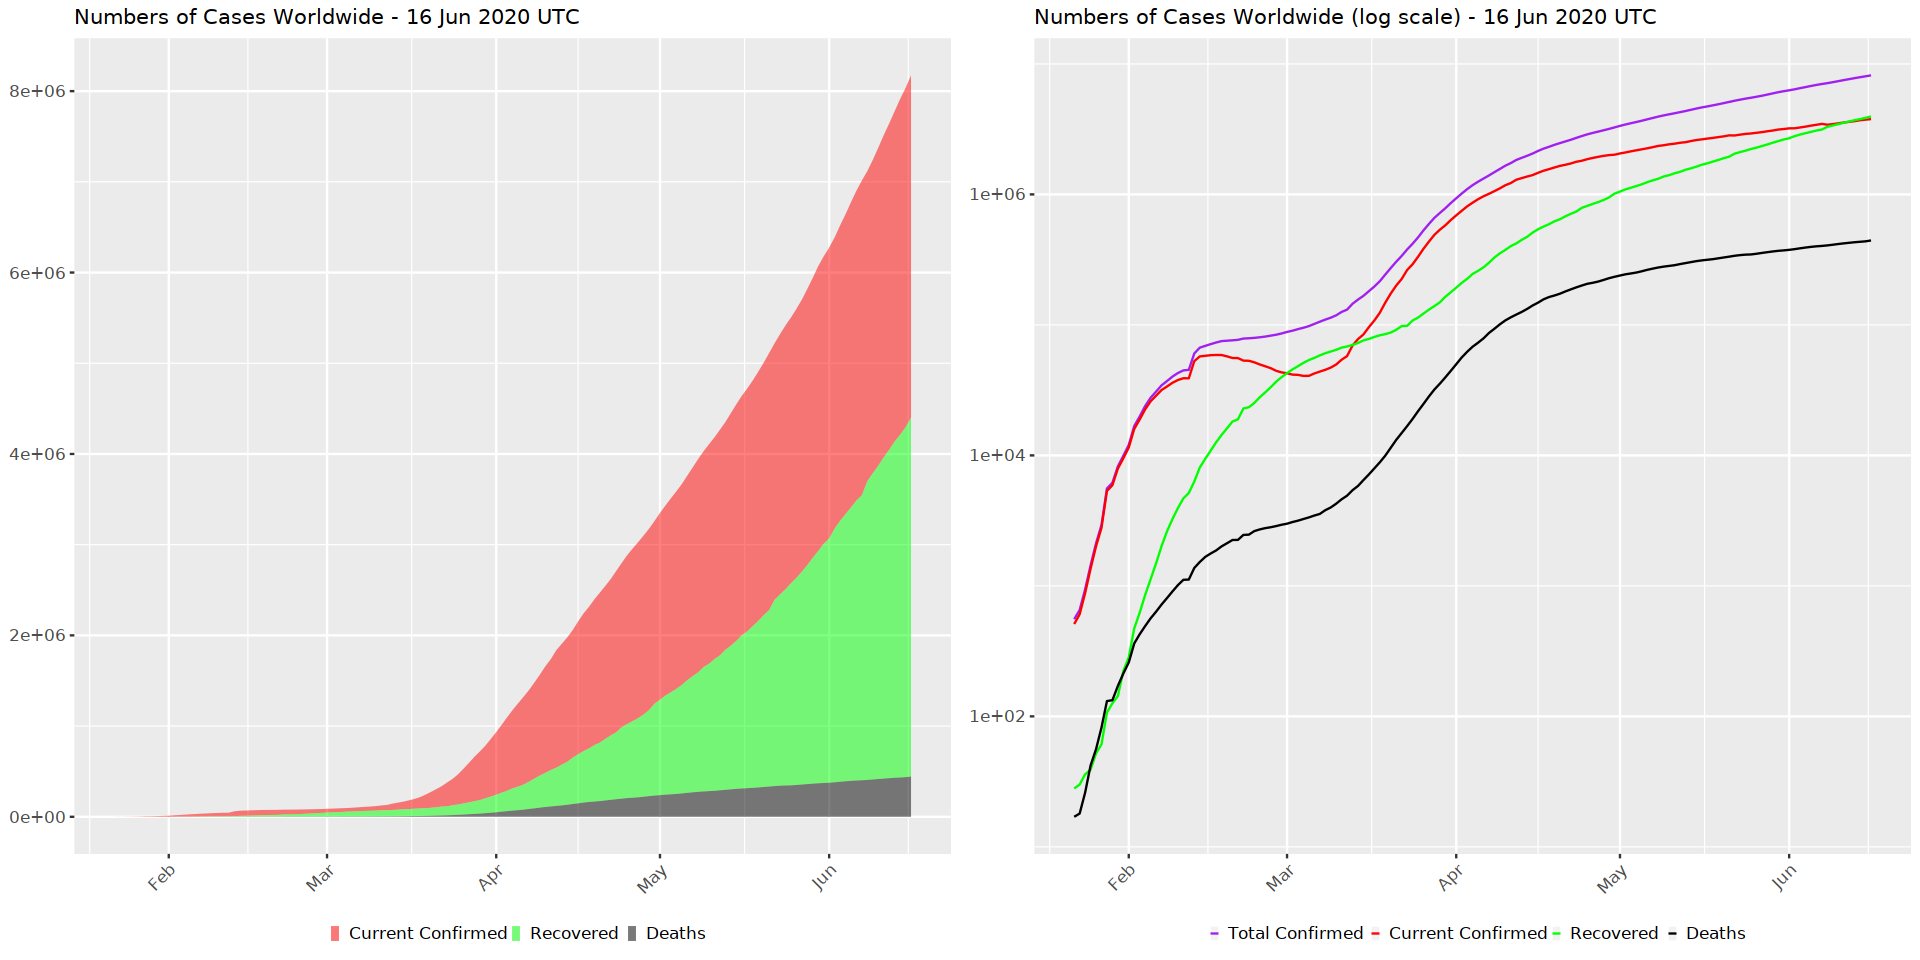

In [14]:
# data %<>% filter(country=='China')
# data %<>% filter(country=='Australia')
world.long <- data.long %>% filter(country == 'World')
## cases - area plot
plot1 <- world.long %>% filter(type != 'Total Confirmed') %>%
ggplot(aes(x=date, y=count)) +
geom_area(aes(fill=type), alpha=0.5) +
labs(title=paste0('Numbers of Cases Worldwide - ', max.date.txt)) +
scale_fill_manual(values=c('red', 'green', 'black')) +
theme(legend.title=element_blank(), legend.position='bottom',
plot.title = element_text(size=12),
axis.title.x=element_blank(),
axis.title.y=element_blank(),
legend.key.size=unit(0.2, 'cm'),
legend.text=element_text(size=10),
axis.text=element_text(size=10),
axis.text.x=element_text(angle=45, hjust=1))
plot2 <- world.long %>%
ggplot(aes(x=date, y=count)) +
geom_line(aes(color=type)) +
labs(title=paste0('Numbers of Cases Worldwide (log scale) - ', max.date.txt)) +
scale_color_manual(values=c('purple', 'red', 'green', 'black')) +
theme(legend.title=element_blank(), legend.position='bottom',
plot.title = element_text(size=12),
axis.title.x=element_blank(),
axis.title.y=element_blank(),
legend.key.size=unit(0.2, 'cm'),
legend.text=element_text(size=10),
axis.text=element_text(size=10),
axis.text.x=element_text(angle=45, hjust=1)) +
scale_y_continuous(trans='log10')
## show two plots side by side
fig(16,8)
grid.arrange(plot1, plot2, ncol=2)


>4.3 Current Confirmed Cases


In [15]:
data.world <- data %>% filter(country=='World')
n <- nrow(data.world)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


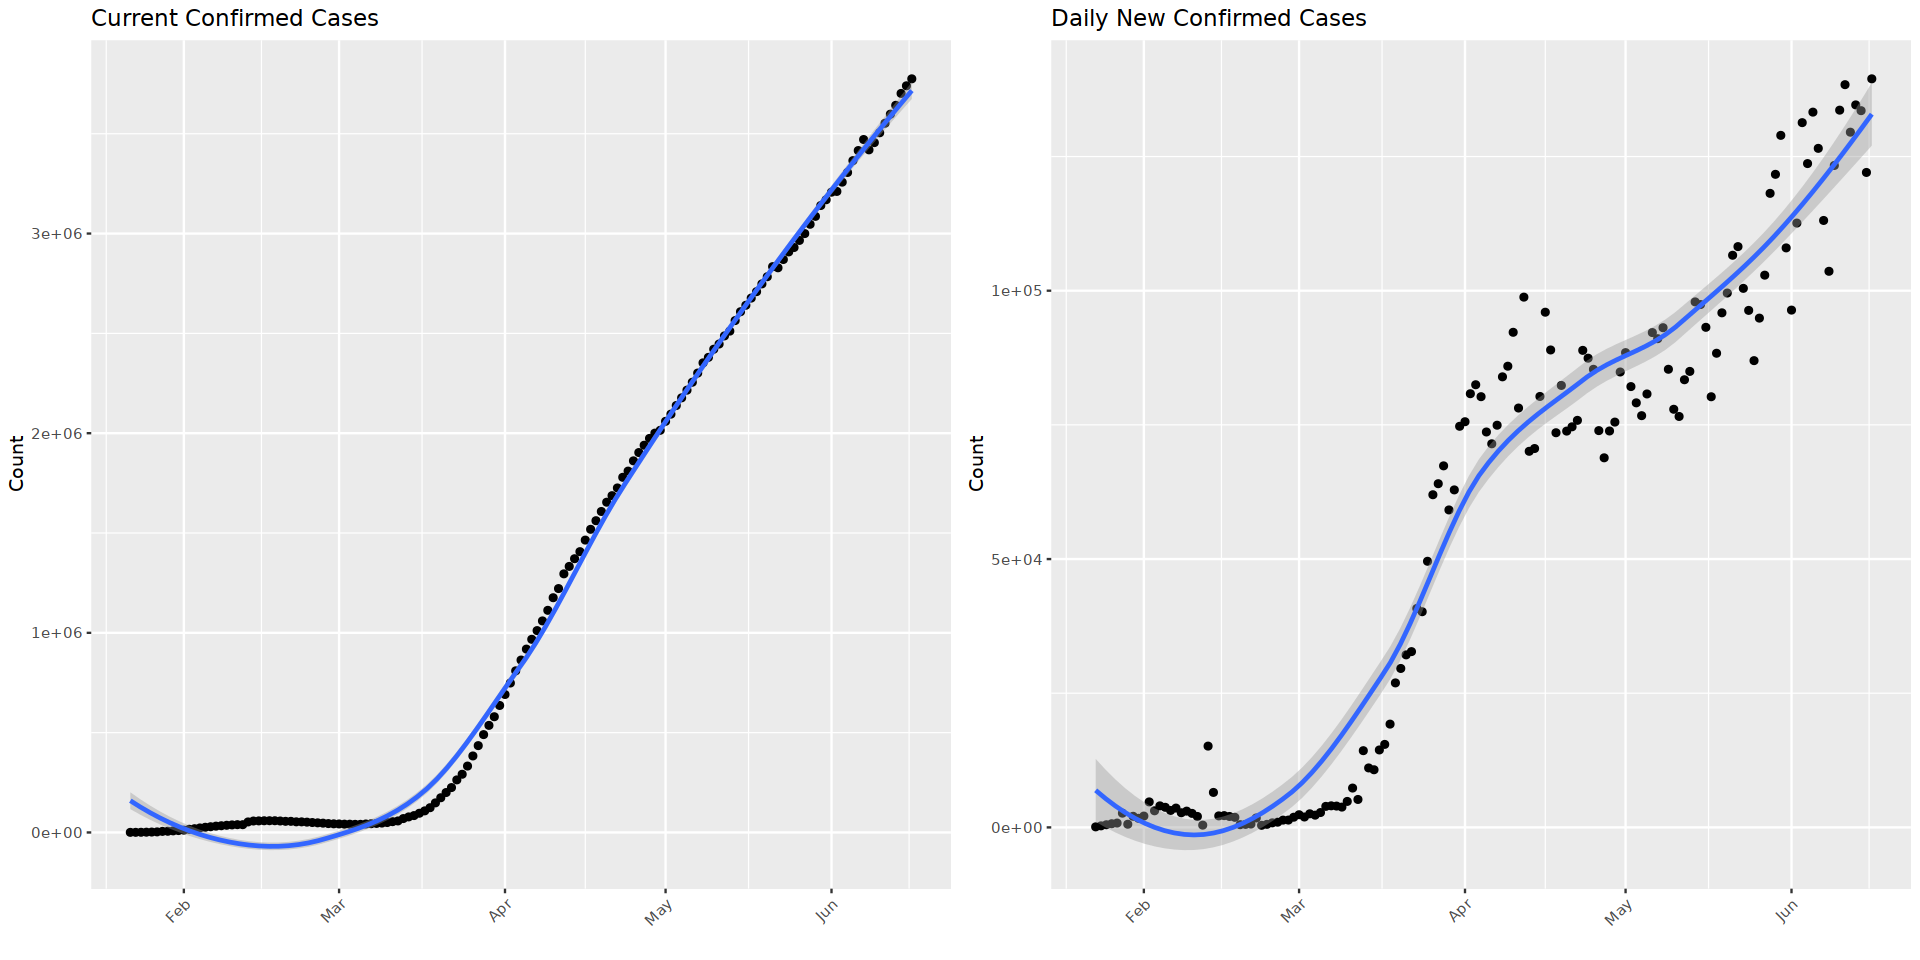

In [16]:
## current confirmed and daily new confirmed
plot1 <- ggplot(data.world, aes(x=date, y=current.confirmed)) +
geom_point() + geom_smooth() +
xlab('') + ylab('Count') + labs(title='Current Confirmed Cases') +
theme(axis.text.x=element_text(angle=45, hjust=1))
plot2 <- ggplot(data.world, aes(x=date, y=new.confirmed)) +
geom_point() + geom_smooth() +
xlab('') + ylab('Count') + labs(title='Daily New Confirmed Cases') +
theme(axis.text.x=element_text(angle=45, hjust=1))
## show two plots side by side
fig(16,8)
grid.arrange(plot1, plot2, ncol=2)


The figure above shows the numbers of current (see left chart) and new (see right chart) confirmed cases. The blue
lines are smoothed conditional means and the grey band around them show the 95% confidence interval.

>4.4 Deaths and Recovered Cases

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


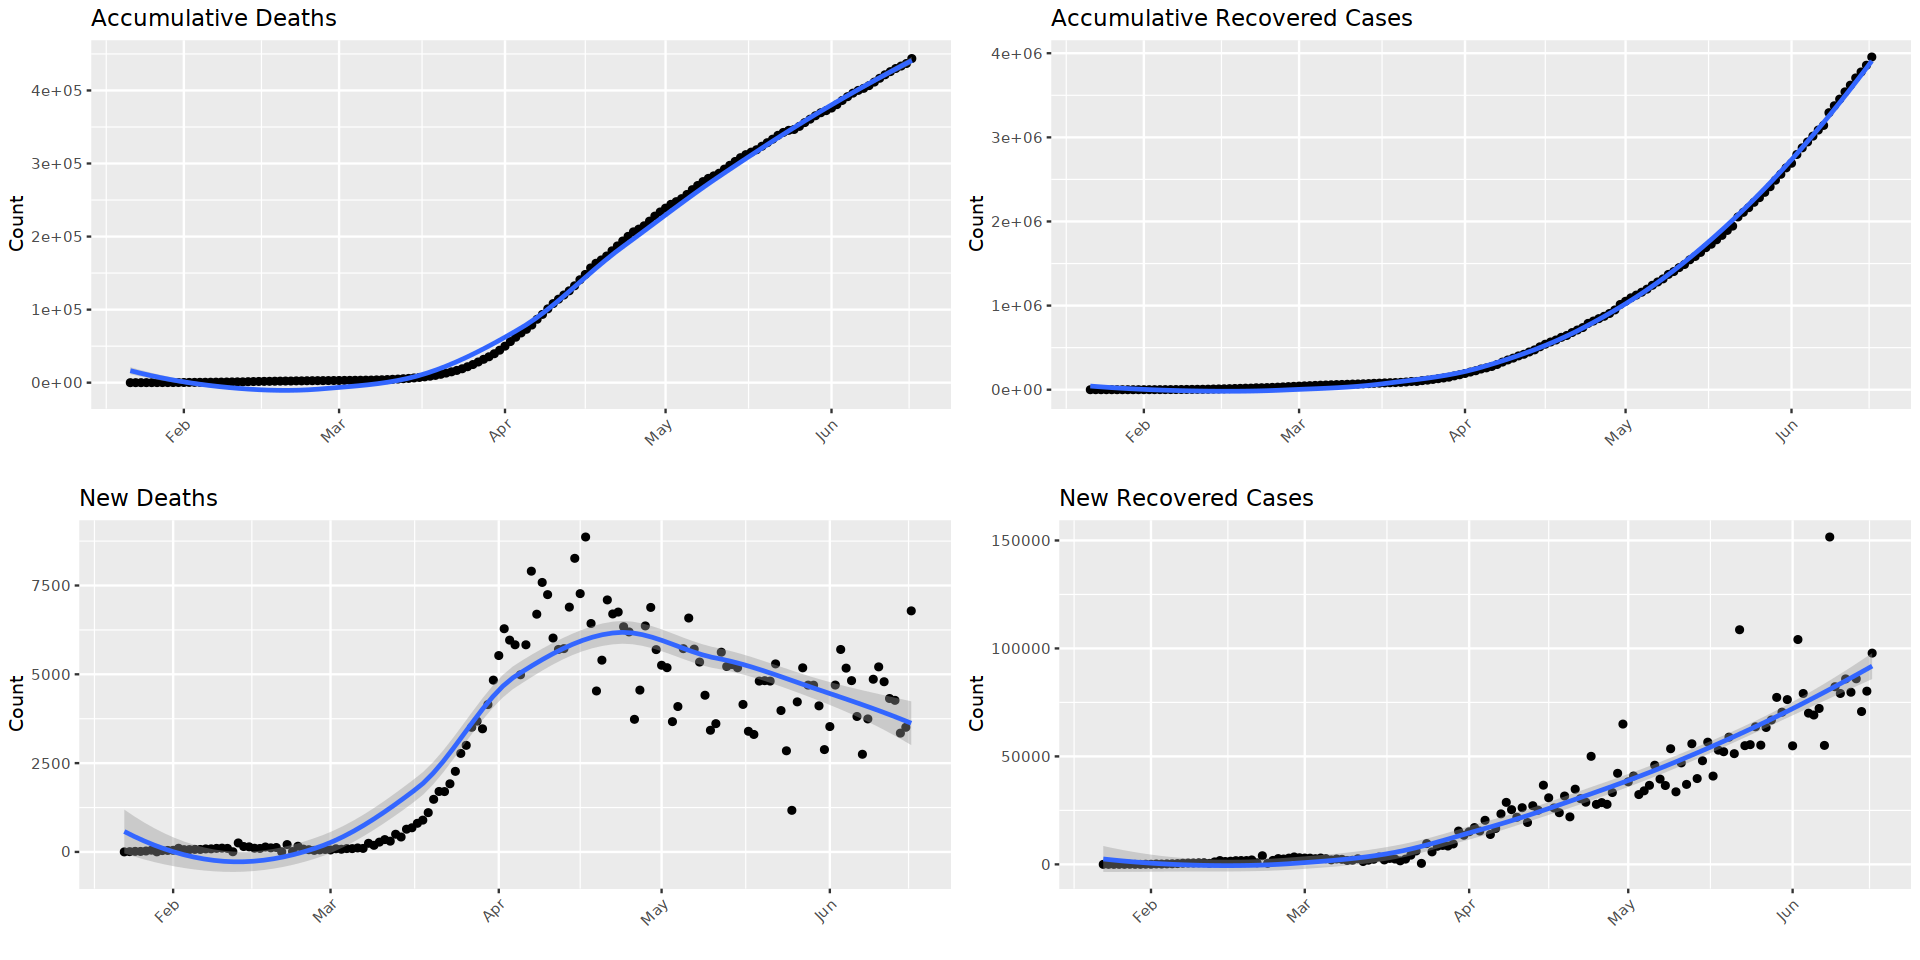

In [17]:
## a scatter plot with a smoothed line and vertical x-axis labels
plot1 <- ggplot(data.world, aes(x=date, y=deaths)) +
geom_point() + geom_smooth() +
xlab('') + ylab('Count') + labs(title='Accumulative Deaths') +
theme(axis.text.x=element_text(angle=45, hjust=1))
plot2 <- ggplot(data.world, aes(x=date, y=recovered)) +
geom_point() + geom_smooth() +
xlab('') + ylab('Count') + labs(title='Accumulative Recovered Cases') +
theme(axis.text.x=element_text(angle=45, hjust=1))
plot3 <- ggplot(data.world, aes(x=date, y=new.deaths)) +
geom_point() + geom_smooth() +
xlab('') + ylab('Count') + labs(title='New Deaths') +
theme(axis.text.x=element_text(angle=45, hjust=1))
plot4 <- ggplot(data.world, aes(x=date, y=new.recovered)) +
geom_point() + geom_smooth() +
xlab('') + ylab('Count') + labs(title='New Recovered Cases') +
theme(axis.text.x=element_text(angle=45, hjust=1))
## show four plots together, with 2 plots in each row
fig(16,8)
grid.arrange(plot1, plot2, plot3, plot4, nrow=2)


>4.5 Death Rates

Warning message:
“Removed 1 rows containing missing values (geom_path).”


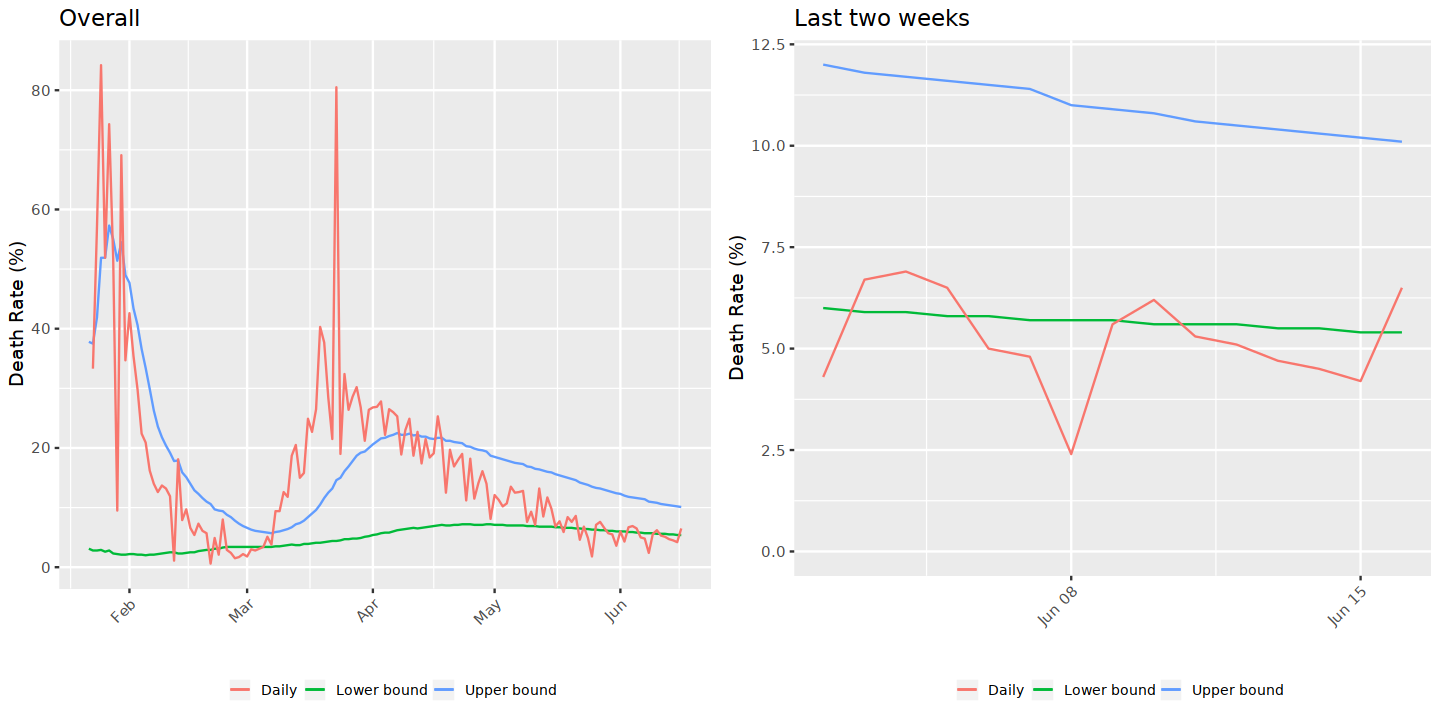

In [18]:
## three death rates
plot1 <- ggplot(data.world, aes(x=date)) +
geom_line(aes(y=rate.upper, colour='Upper bound')) +
geom_line(aes(y=rate.lower, colour='Lower bound')) +
geom_line(aes(y=rate.daily, colour='Daily')) +
xlab('') + ylab('Death Rate (%)') + labs(title='Overall') +
theme(legend.position='bottom', legend.title=element_blank(),
legend.text=element_text(size=8),
legend.key.size=unit(0.5, 'cm'),
axis.text.x=element_text(angle=45, hjust=1))
## focusing on last 2 weeks
y.max <- data.world[n-(14:0), ] %>% select(rate.upper, rate.lower, rate.daily) %>% max()
plot2 <- ggplot(data.world[n-(14:0),], aes(x=date)) +
geom_line(aes(y=rate.upper, colour='Upper bound')) +
geom_line(aes(y=rate.lower, colour='Lower bound')) +
geom_line(aes(y=rate.daily, colour='Daily')) +
xlab('') + ylab('Death Rate (%)') + labs(title='Last two weeks') +
theme(legend.position='bottom', legend.title=element_blank(),
legend.text=element_text(size=8),
legend.key.size=unit(0.5, 'cm'),
axis.text.x=element_text(angle=45, hjust=1)) +
ylim(c(0, y.max))
fig(12,6)
grid.arrange(plot1, plot2, ncol=2)


## 5. Top Twenty Countries
Next, we will have a look at the top 20 countries in total confirmed cases

In [19]:
## ranking by confirmed cases
data.latest.all <- data %>% filter(date == max(date)) %>%
select(country, date,
confirmed, new.confirmed, current.confirmed,
recovered, deaths, new.deaths, death.rate=rate.lower) %>%
mutate(ranking = dense_rank(desc(confirmed)))
k <- 20
## top 20 countries: 21 incl. 'World'
top.countries <- data.latest.all %>% filter(ranking <= k + 1) %>%
arrange(ranking) %>% pull(country) %>% as.character()
top.countries %>% setdiff('World') %>% print()

 [1] "US"             "Brazil"         "Russia"         "India"         
 [5] "United Kingdom" "Spain"          "Italy"          "Peru"          
 [9] "France"         "Iran"           "Germany"        "Chile"         
[13] "Turkey"         "Mexico"         "Pakistan"       "Saudi Arabia"  
[17] "Canada"         "Bangladesh"     "China"          "Qatar"         


In [20]:
## add 'Others'
top.countries %<>% c('Others')
## put all others in a single group of 'Others'
data.latest <- data.latest.all %>% filter(!is.na(country)) %>%
mutate(country=ifelse(ranking <= k + 1, as.character(country), 'Others')) %>%
mutate(country=country %>% factor(levels=c(top.countries)))
data.latest %<>% group_by(country)  %>%
summarise(confirmed=sum(confirmed), new.confirmed=sum(new.confirmed),
current.confirmed=sum(current.confirmed),
recovered=sum(recovered), deaths=sum(deaths), new.deaths=sum(new.deaths)) %>%
mutate(death.rate=(100 * deaths/confirmed) %>% round(1))
data.latest %<>% select(c(country, confirmed, deaths, death.rate,
new.confirmed, new.deaths, current.confirmed))
data.latest %>% mutate(death.rate=death.rate %>% format(nsmall=1) %>% paste0('%'))

## convert from wide to long format, for drawing area plots
data.latest.long <- data.latest %>% filter(country!='World') %>%
gather(key=type, value=count, -country)
## set factor levels to show them with proper text and in a desirable order
data.latest.long %<>% mutate(type=recode_factor(type,
confirmed='Total Confirmed',
deaths='Total Deaths',
death.rate='Death Rate (%)',
new.confirmed='New Confirmed (compared with one day before)',
new.deaths='New Deaths (compared with one day before)',
current.confirmed='Current Confirmed'))



country        confirmed deaths death.rate new.confirmed new.deaths
1  World          8173940   443685  5.4%      139479        6786      
2  US             2137731   116963  5.5%       23705         836      
3  Brazil          923189    45241  4.9%       34918        1282      
4  Russia          544725     7274  1.3%        8241         193      
5  India           354065    11903  3.4%       10974        2003      
6  United Kingdom  299600    42054 14.0%        1285         233      
7  Spain           244328    27136 11.1%         219           0      
8  Italy           237500    34405 14.5%         210          34      
9  Peru            237156     7056  3.0%        4164         196      
10 France          194347    29550 15.2%          42         111      
11 Iran            192439     9065  4.7%        2563         115      
12 Germany         188252     8820  4.7%         570          13      
13 Chile           184449     3383  1.8%        5013          21      
14 Turkey          181298     4842  2.7%        1467          17      
15 Mexico          154863    18310 11.8%        4599         730      
16 Pakistan        154760     2975  1.9%        5839         136      
17 Saudi Arabia    136315     1052  0.8%        4267          41      
18 Canada          101087     8271  8.2%         324          43      
19 Bangladesh       94481     1262  1.3%        3862          53      
20 China            84422     4638  5.5%          44           0      
21 Qatar            82077       80  0.1%        1201           4      
22 Others         1446856    59405  4.1%       25972         725      
   current.confirmed
1  3775086          
2  1437265          
3   387943          
4   243671          
5   155227          
6   256253          
7    66816          
8    24569          
9   104895          
10   91338          
11   30699          
12    6590          
13   24834          
14   23077          
15   21159          
16   93348          
17   45723          
18   30917          
19   56955          
20     291          
21   21536          
22  651980

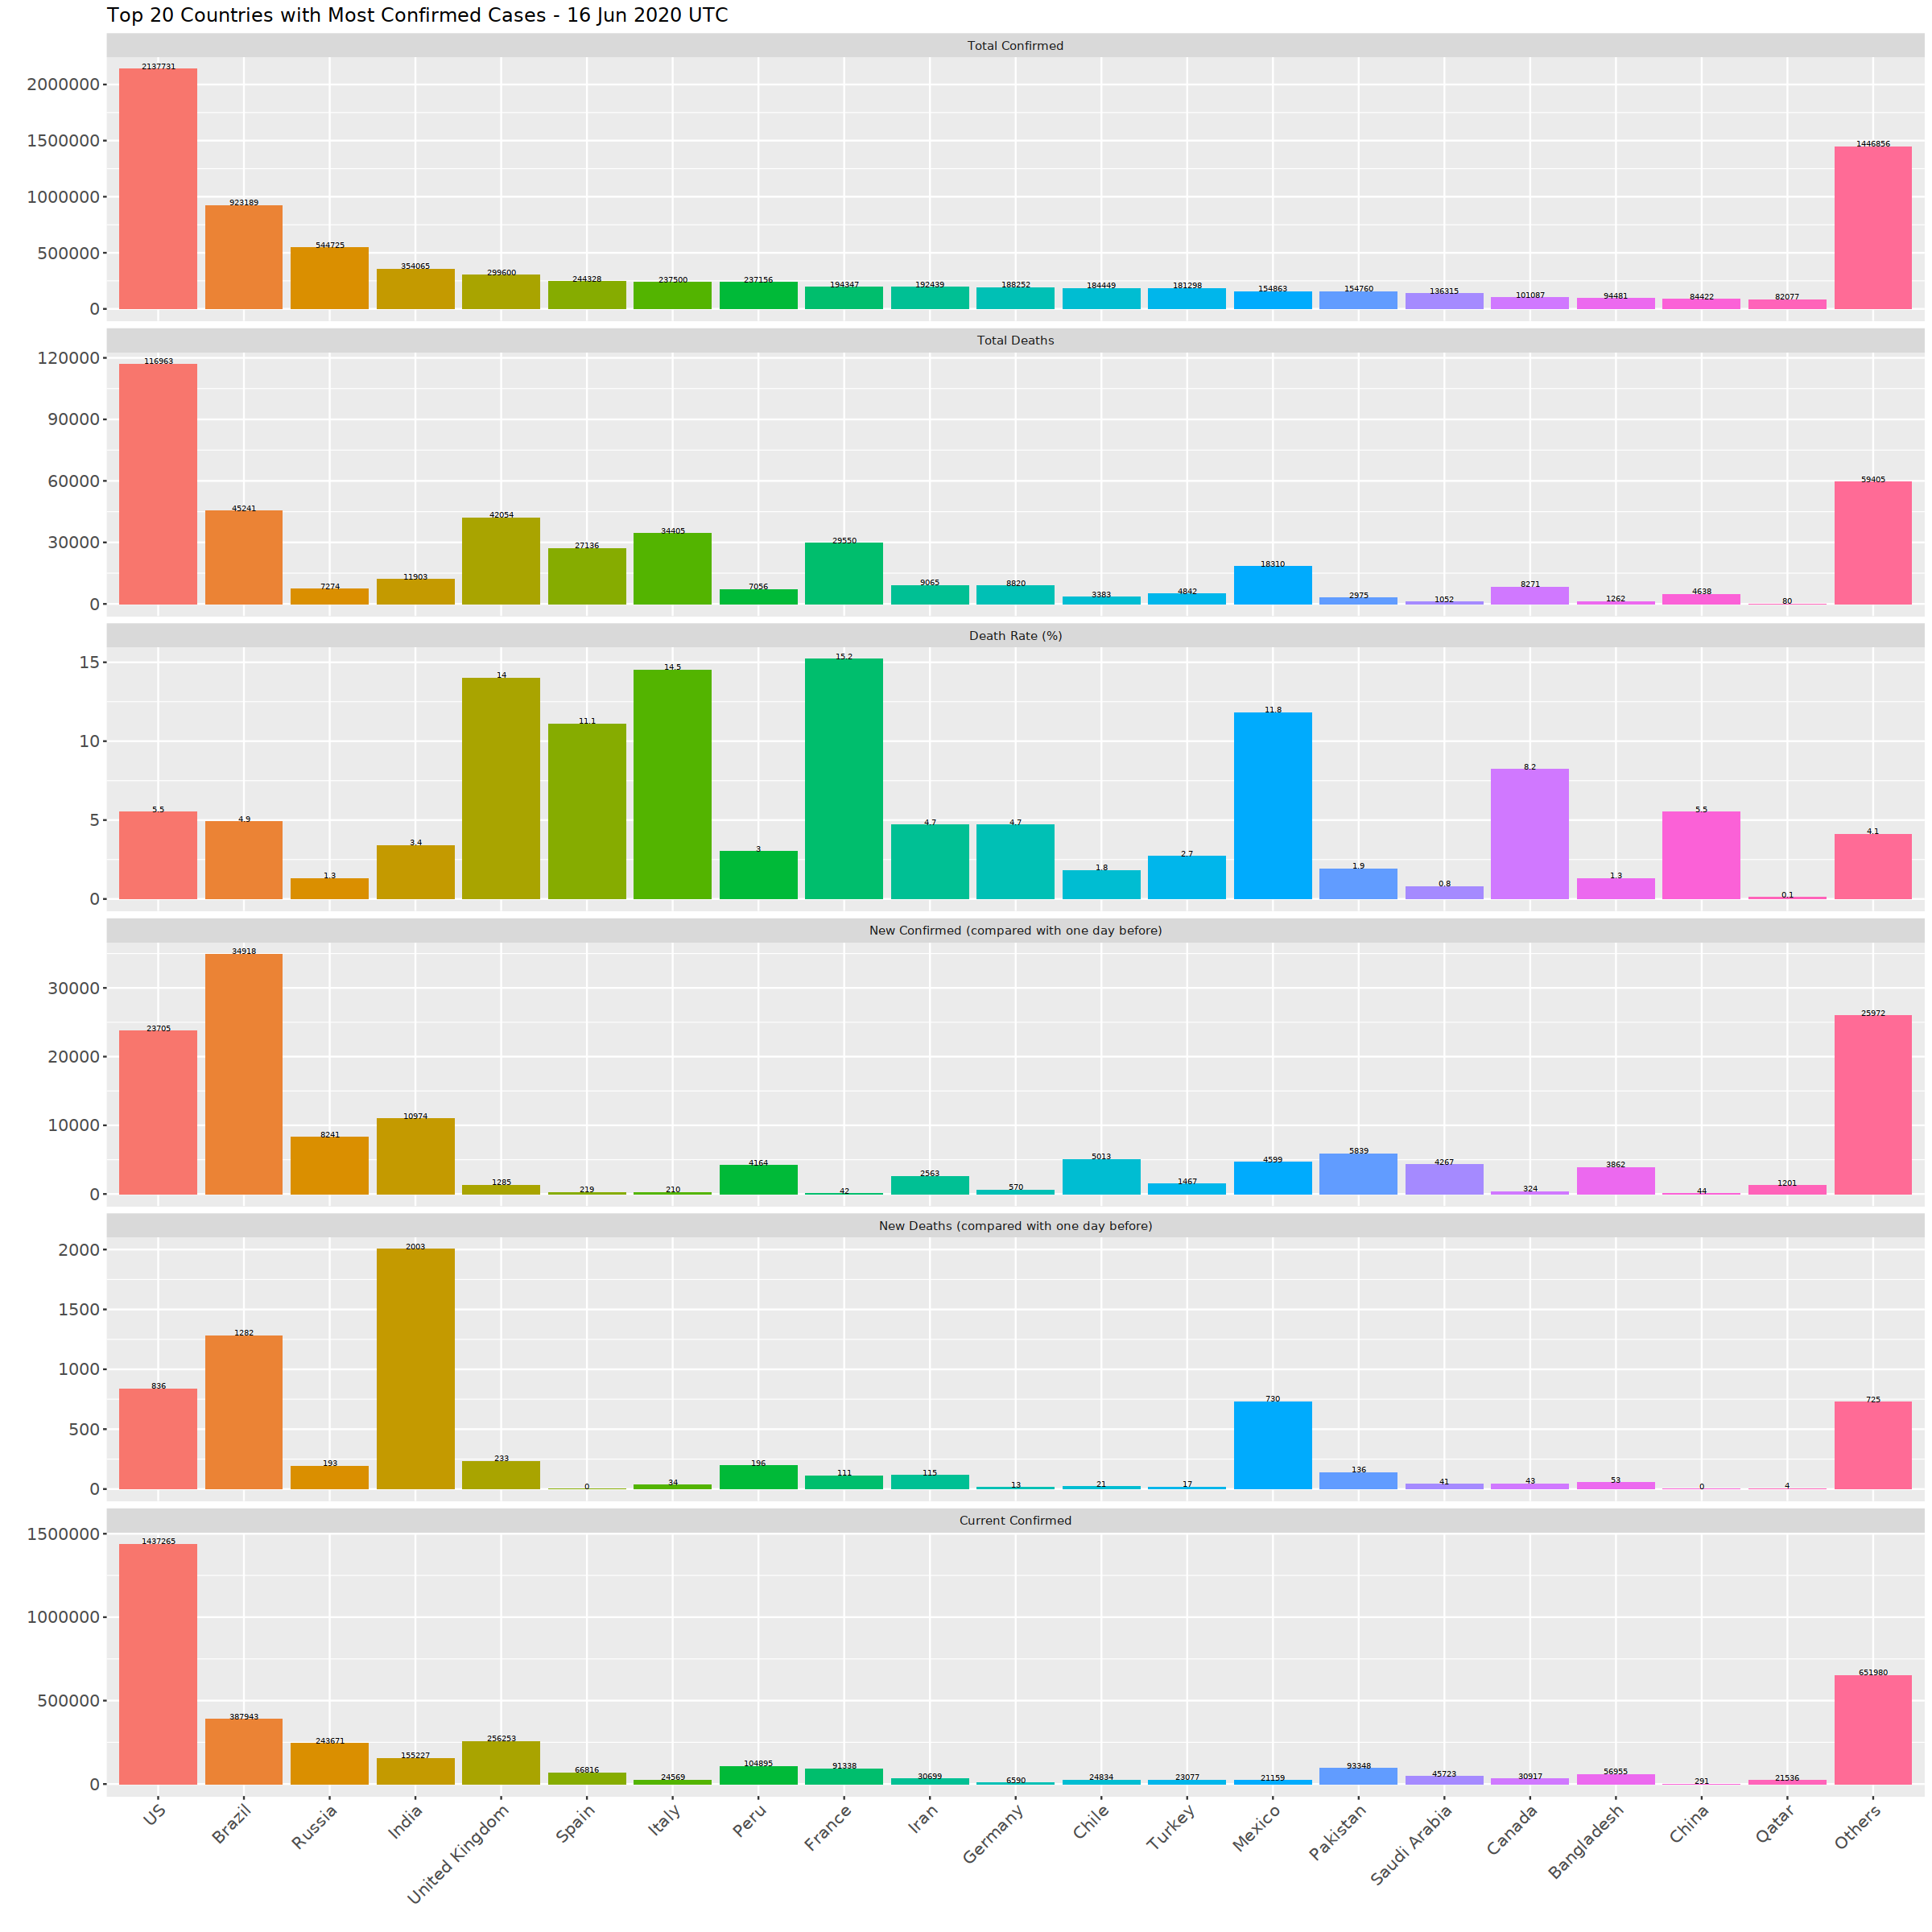

In [31]:
## bar chart
data.latest.long %>% ggplot(aes(x=country, y=count, fill=country, group=country)) +
geom_bar(stat='identity') +
geom_text(aes(label=count, y=count), size=2, vjust=0) +
xlab('') + ylab('') +
labs(title=paste0('Top 20 Countries with Most Confirmed Cases - ', max.date.txt)) +
scale_fill_discrete(name='Country', labels=aes(count)) +
theme(legend.title=element_blank(),
legend.position='none',
plot.title=element_text(size=14),
axis.text=element_text(size=12),
axis.text.x=element_text(angle=45, hjust=1)) +
facet_wrap(~type, ncol=1, scales='free_y')
fig(24,10)

>5.1 Confirmed vs Deaths

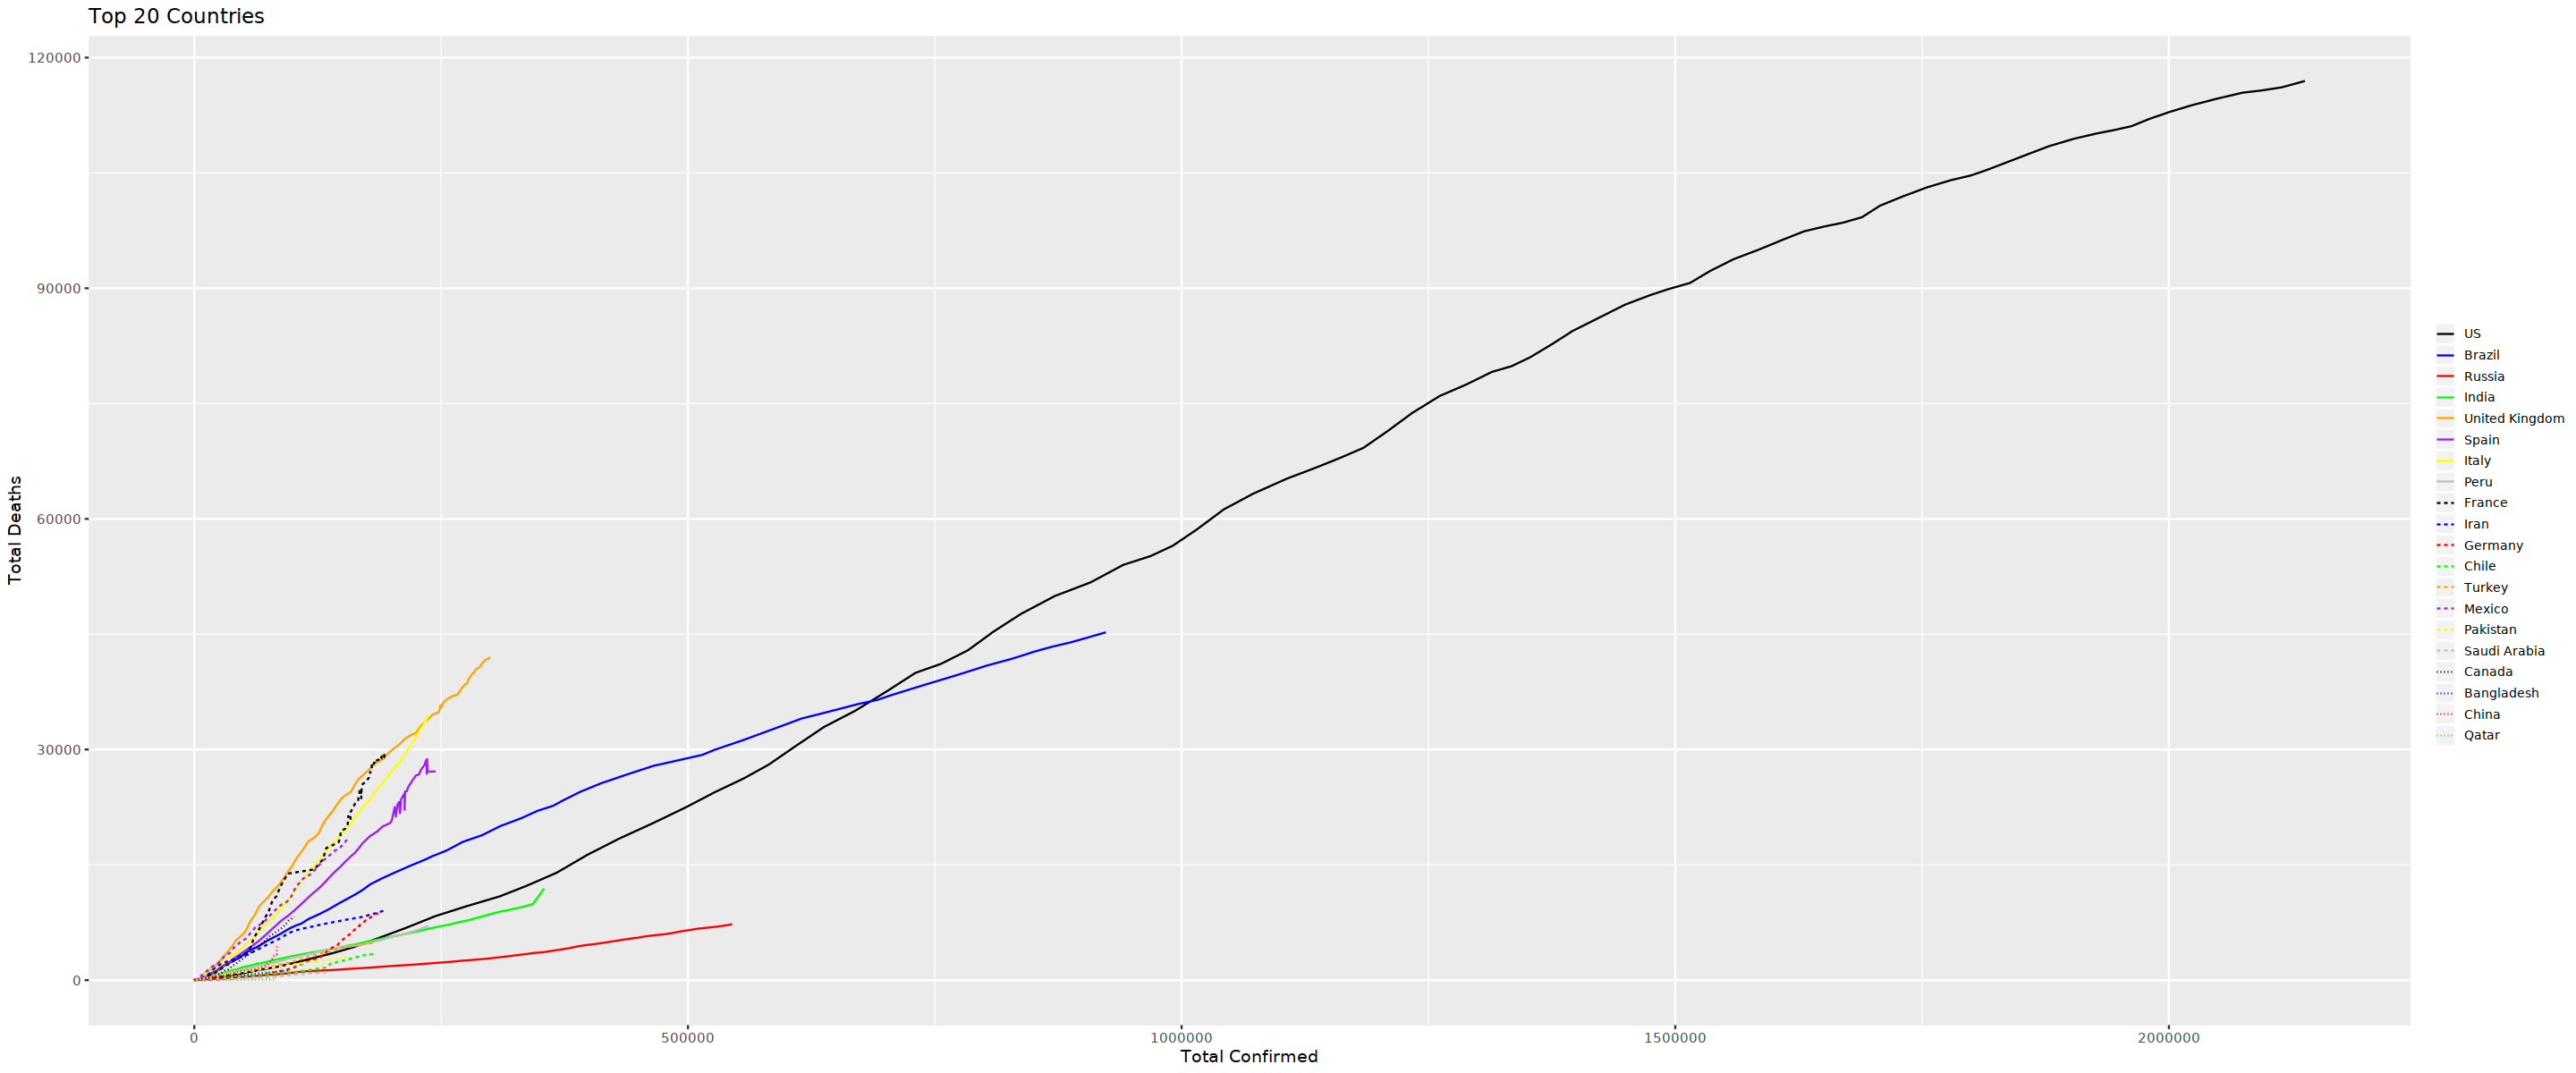

In [22]:
# linetypes <- rep(c("dotted", "dashed", "solid"), each=8)
# colors <- rep(c('grey', 'yellow', 'purple', 'orange', 'green', 'red', 'blue', 'black'), 3)
linetypes <- rep(c("solid", "dashed", "dotted"), each=8)
colors <- rep(c('black', 'blue', 'red', 'green', 'orange', 'purple', 'yellow', 'grey'), 3)
df <- data %>% filter(country %in% setdiff(top.countries, c('World', 'Others'))) %>%
mutate(country=country %>% factor(levels=c(top.countries)))
p <- df %>% ggplot(aes(x=confirmed, y=deaths, group=country)) +
geom_line(aes(color=country, linetype=country)) +
xlab('Total Confirmed') + ylab('Total Deaths') +
scale_linetype_manual(values=linetypes) +
scale_color_manual(values=colors) +
theme(legend.title=element_blank(),
legend.text=element_text(size=8),
legend.key.size=unit(0.5, 'cm'))
p + labs(title=paste0('Top 20 Countries'))
fig(16,8)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


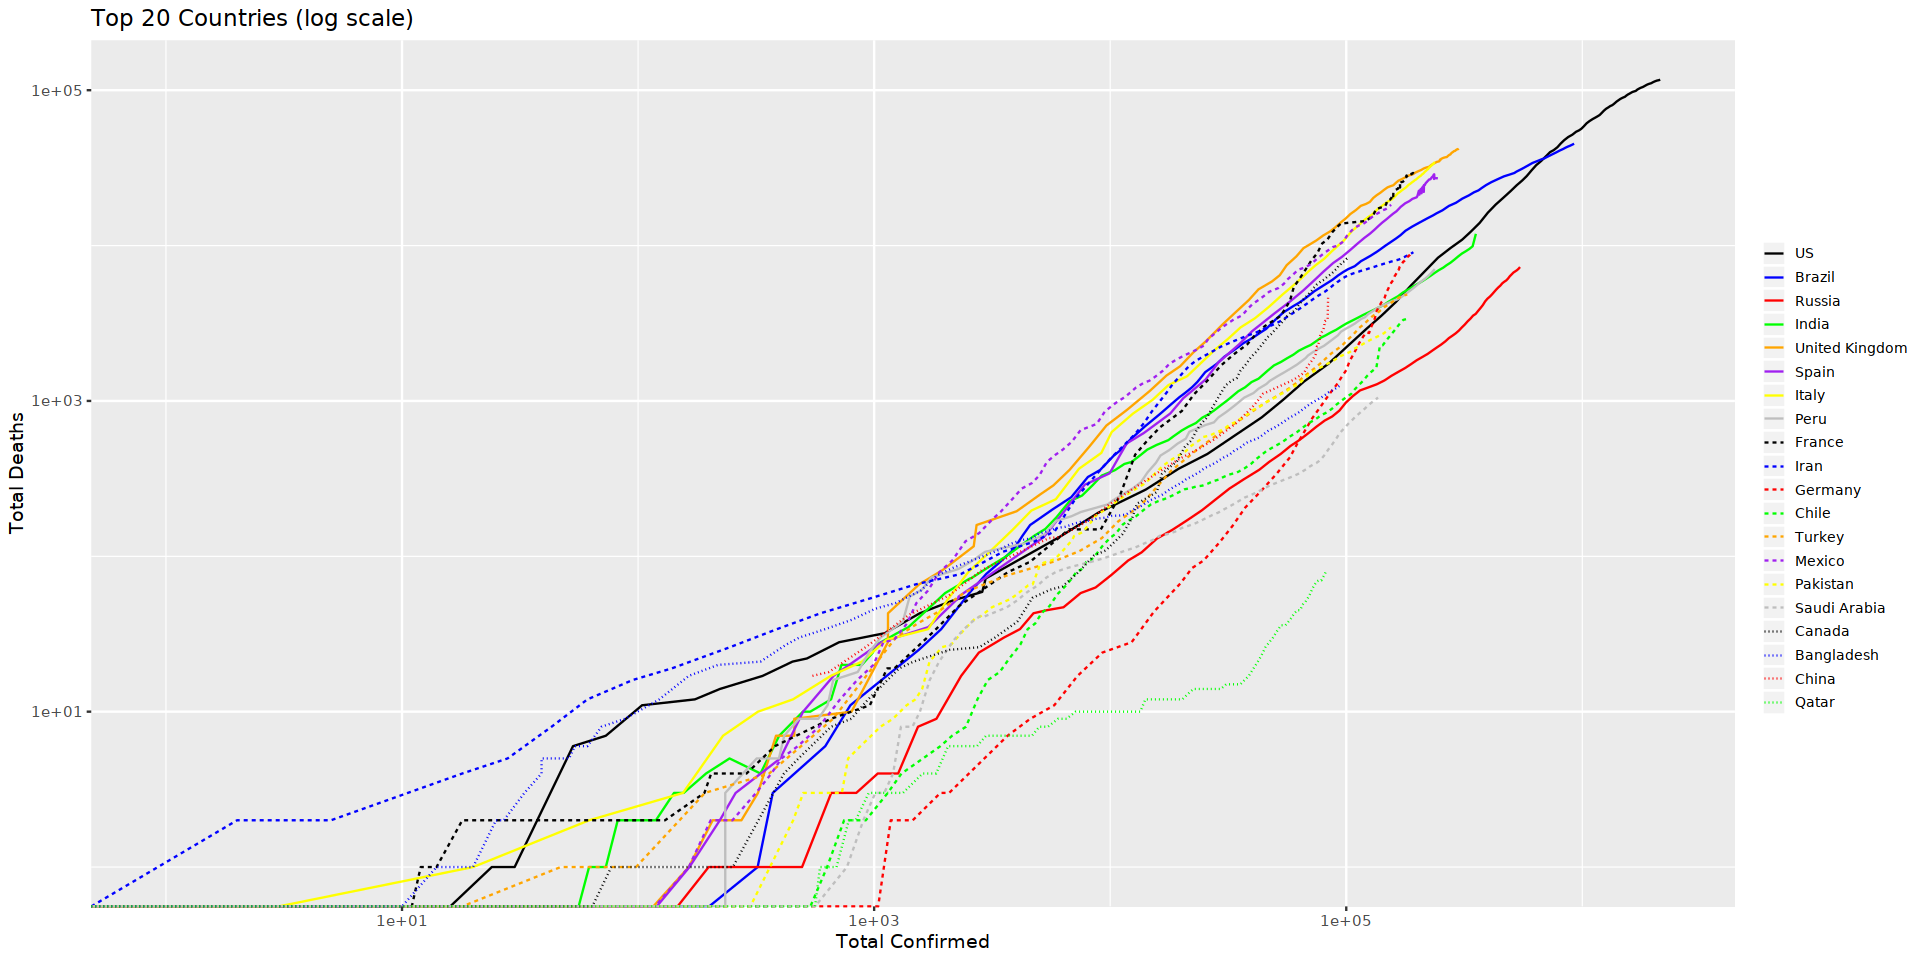

In [23]:
p + scale_x_log10() + scale_y_log10() +
labs(title=paste0('Top 20 Countries (log scale)'))
fig(16,8)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


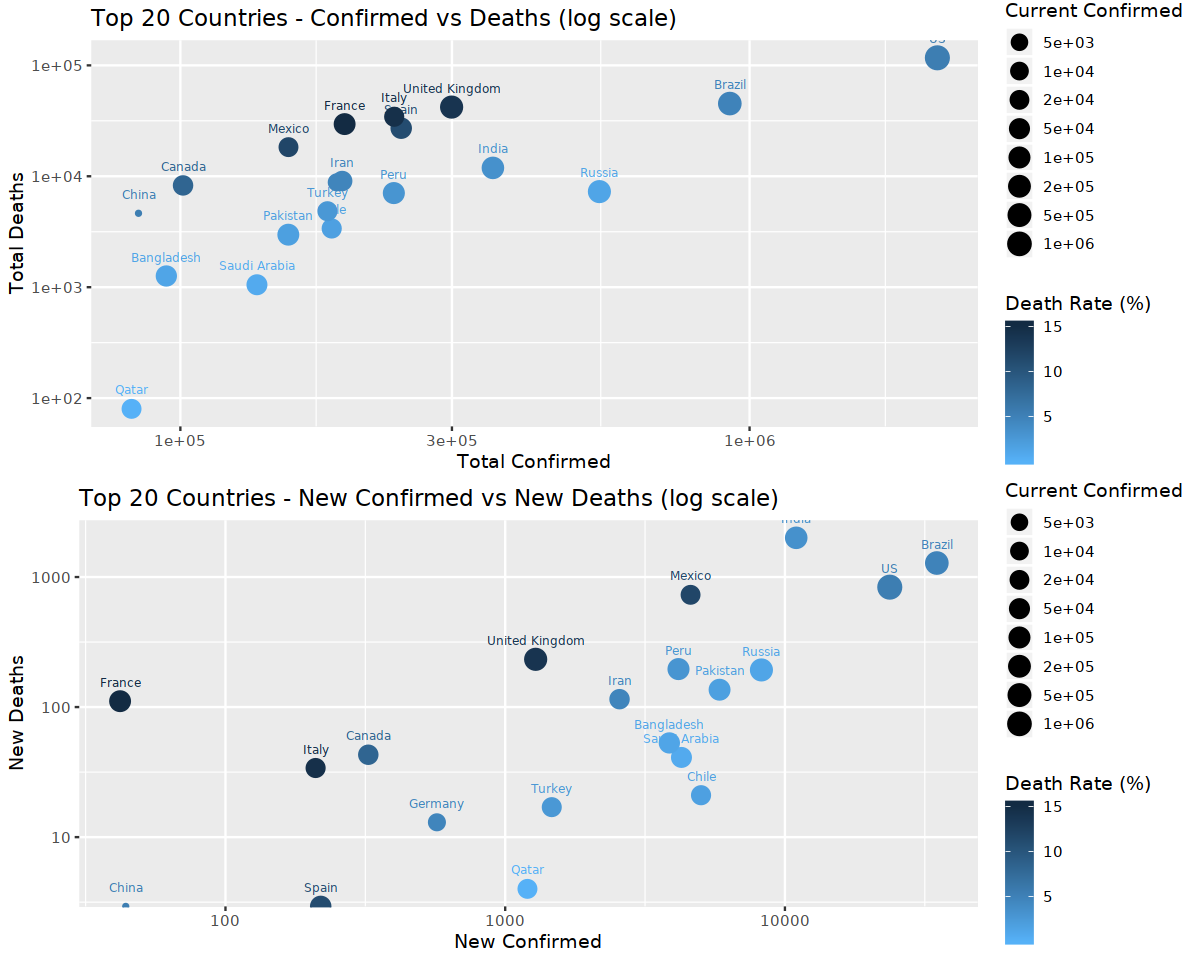

In [36]:
df <- data.latest %>% filter(country %in% setdiff(top.countries, 'World'))
## breaks for circle size in legend; needs to be adjusted accordingly when the number of total confirmed cases increases signficantly
breaks.confirmed <- c(5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7)
plot1 <- df %>% ggplot(aes(x=confirmed, y=deaths, col=death.rate, size=current.confirmed)) +
scale_size(name='Current Confirmed', trans='log2', breaks=breaks.confirmed) +
geom_text(aes(label=country), size=2.5, check_overlap=T, vjust=-1.6) +
geom_point() +
xlab('Total Confirmed') + ylab('Total Deaths') +
labs(col="Death Rate (%)") +
scale_color_gradient(low='#56B1F7', high='#132B43') +
scale_x_log10() + scale_y_log10() +
labs(title=paste0('Top 20 Countries - Confirmed vs Deaths (log scale)'))
plot2 <- df %>% ggplot(aes(x=new.confirmed, y=new.deaths, col=death.rate, size=current.confirmed)) +
scale_size(name='Current Confirmed', trans='log2', breaks=breaks.confirmed) +
geom_text(aes(label=country), size=2.5, check_overlap=T, vjust=-1.6) +
geom_point() +
xlab('New Confirmed') + ylab('New Deaths') +
labs(col="Death Rate (%)") +
scale_color_gradient(low='#56B1F7', high='#132B43') +
scale_x_log10() + scale_y_log10() +
labs(title=paste0('Top 20 Countries - New Confirmed vs New Deaths (log scale)'))
fig(10,8)
grid.arrange(plot1, plot2, ncol=1)

>5.2 Comparison across Countries

Warning message:
“Transformation introduced infinite values in continuous y-axis”


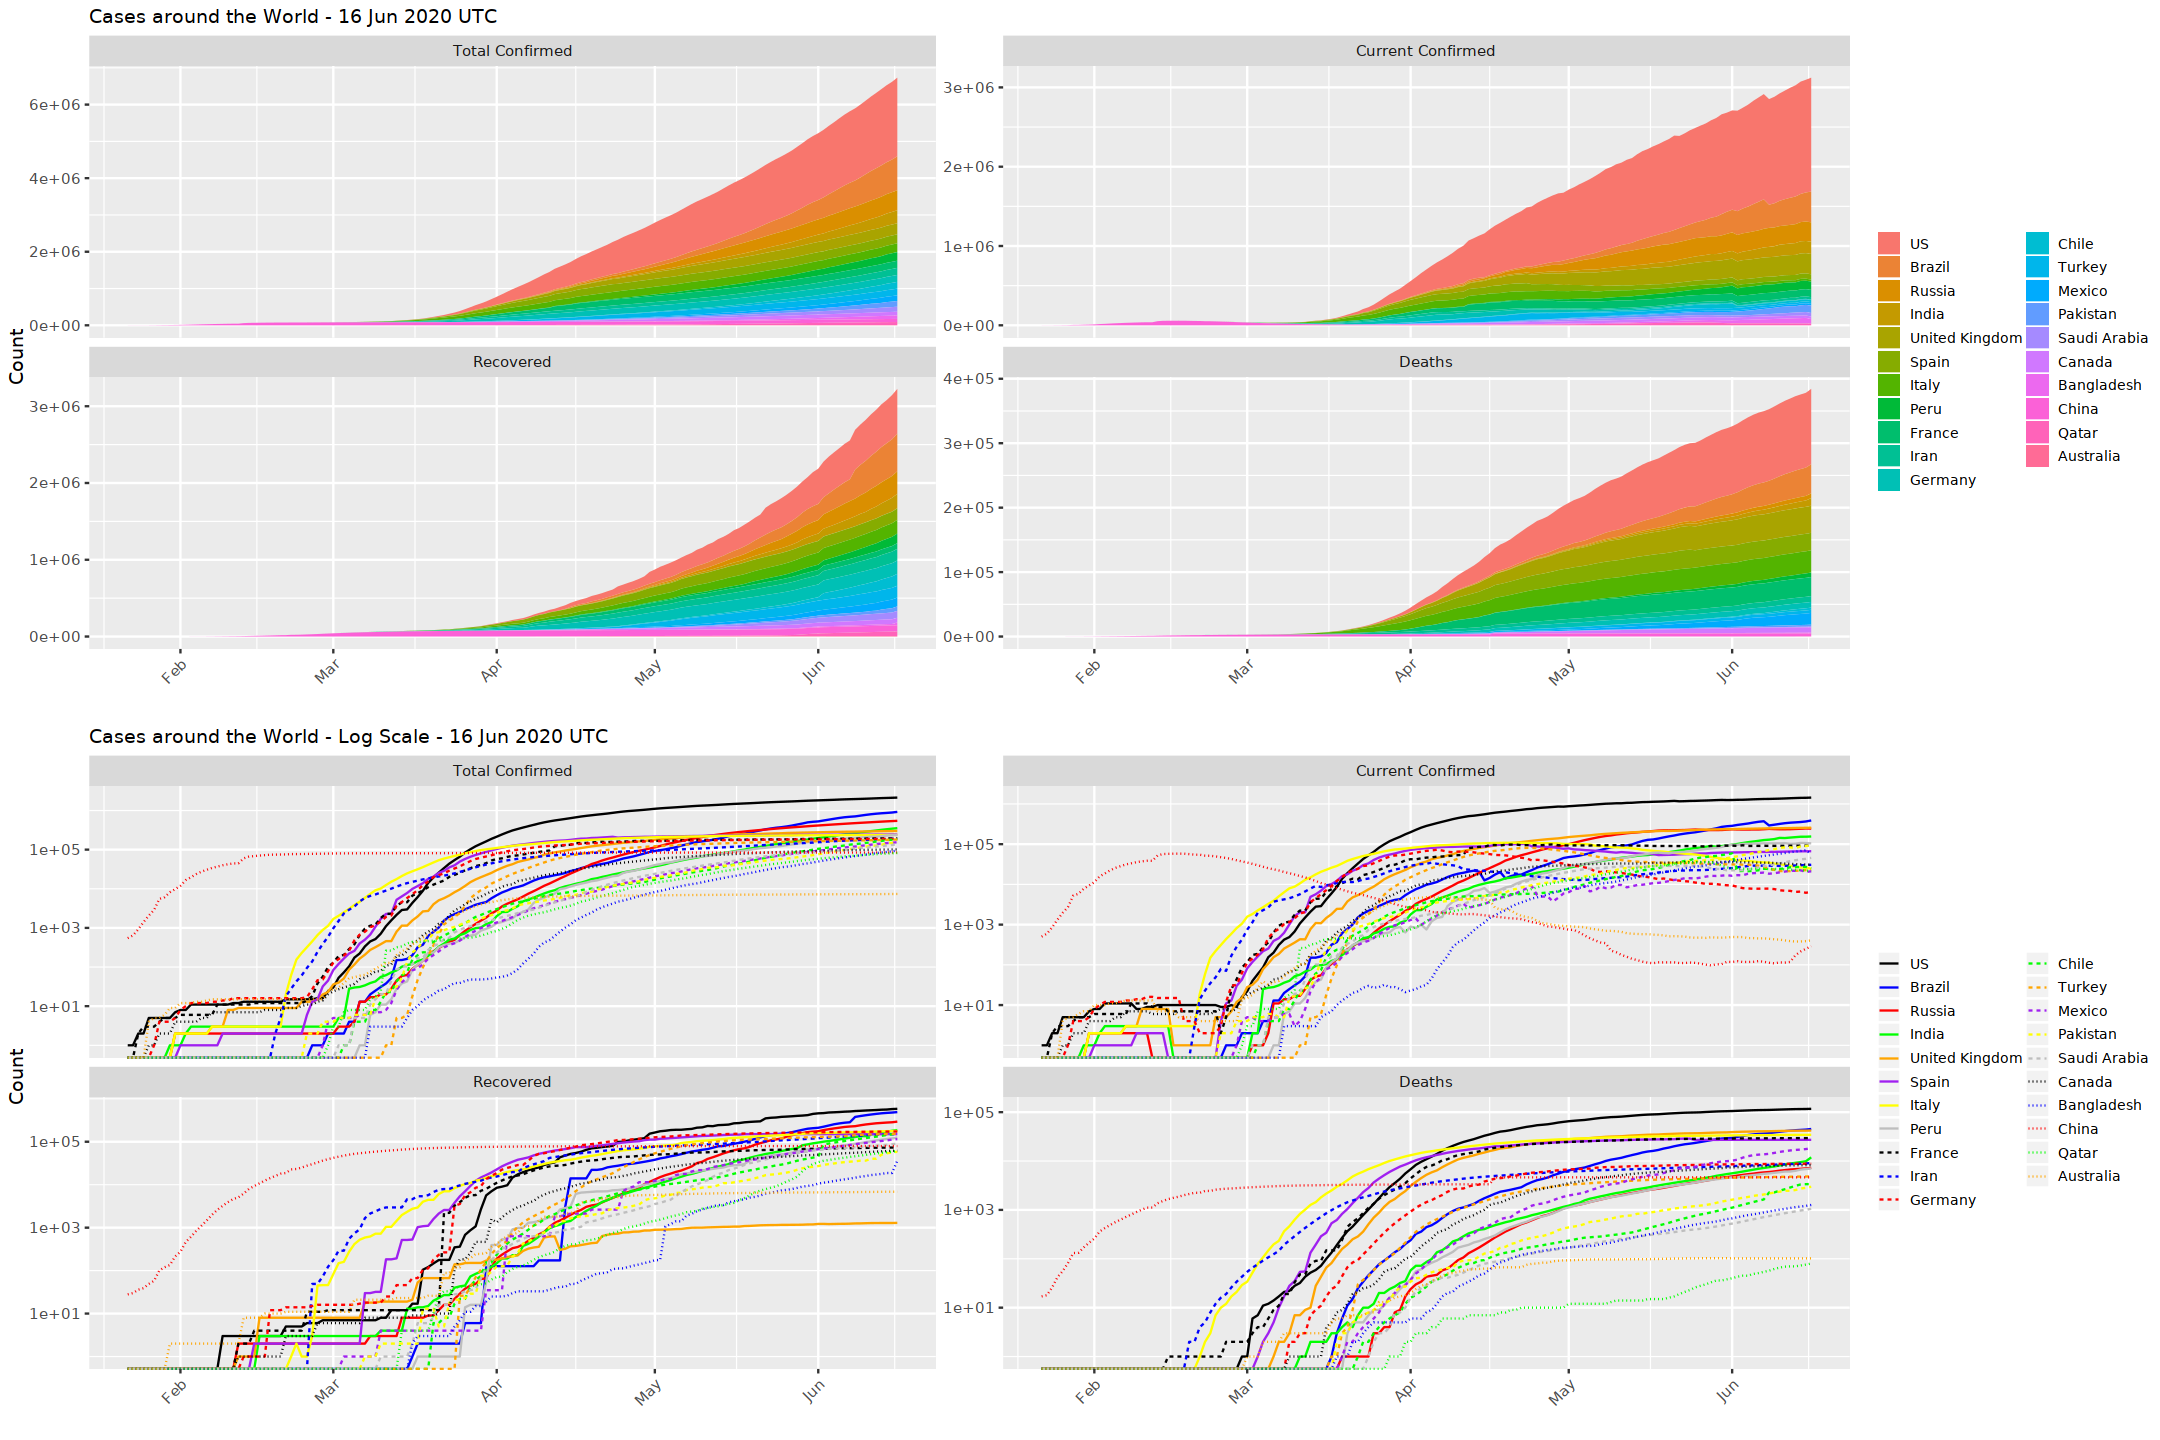

In [37]:
## plot: cases by type
df <- data.long %>% filter(country %in% top.countries) %<>%
mutate(country=country %>% factor(levels=c(top.countries)))
p <- df %>% filter(country != 'World') %>%
ggplot(aes(x=date, y=count)) + xlab('') + ylab('Count') +
theme(legend.title=element_blank(),
legend.text=element_text(size=8),
legend.key.size=unit(0.5, 'cm'),
plot.title=element_text(size=11),
axis.text.x=element_text(angle=45, hjust=1)) +
facet_wrap(~type, ncol=2, scales='free_y')
## area plot
plot1 <- p + geom_area(aes(fill=country)) +
labs(title=paste0('Cases around the World - ', max.date.txt))
## line plot and in log scale
# linetypes <- rep(c("solid", "dashed", "dotted"), each=8)
# colors <- rep(c('black', 'blue', 'red', 'green', 'orange', 'purple', 'yellow', 'grey'), 3)
plot2 <- p + geom_line(aes(color=country, linetype=country)) +
scale_linetype_manual(values=linetypes) +
scale_color_manual(values=colors) +
labs(title=paste0('Cases around the World - Log Scale - ', max.date.txt)) +
scale_y_continuous(trans='log10')
fig(18,12)
grid.arrange(plot1, plot2, ncol=1)


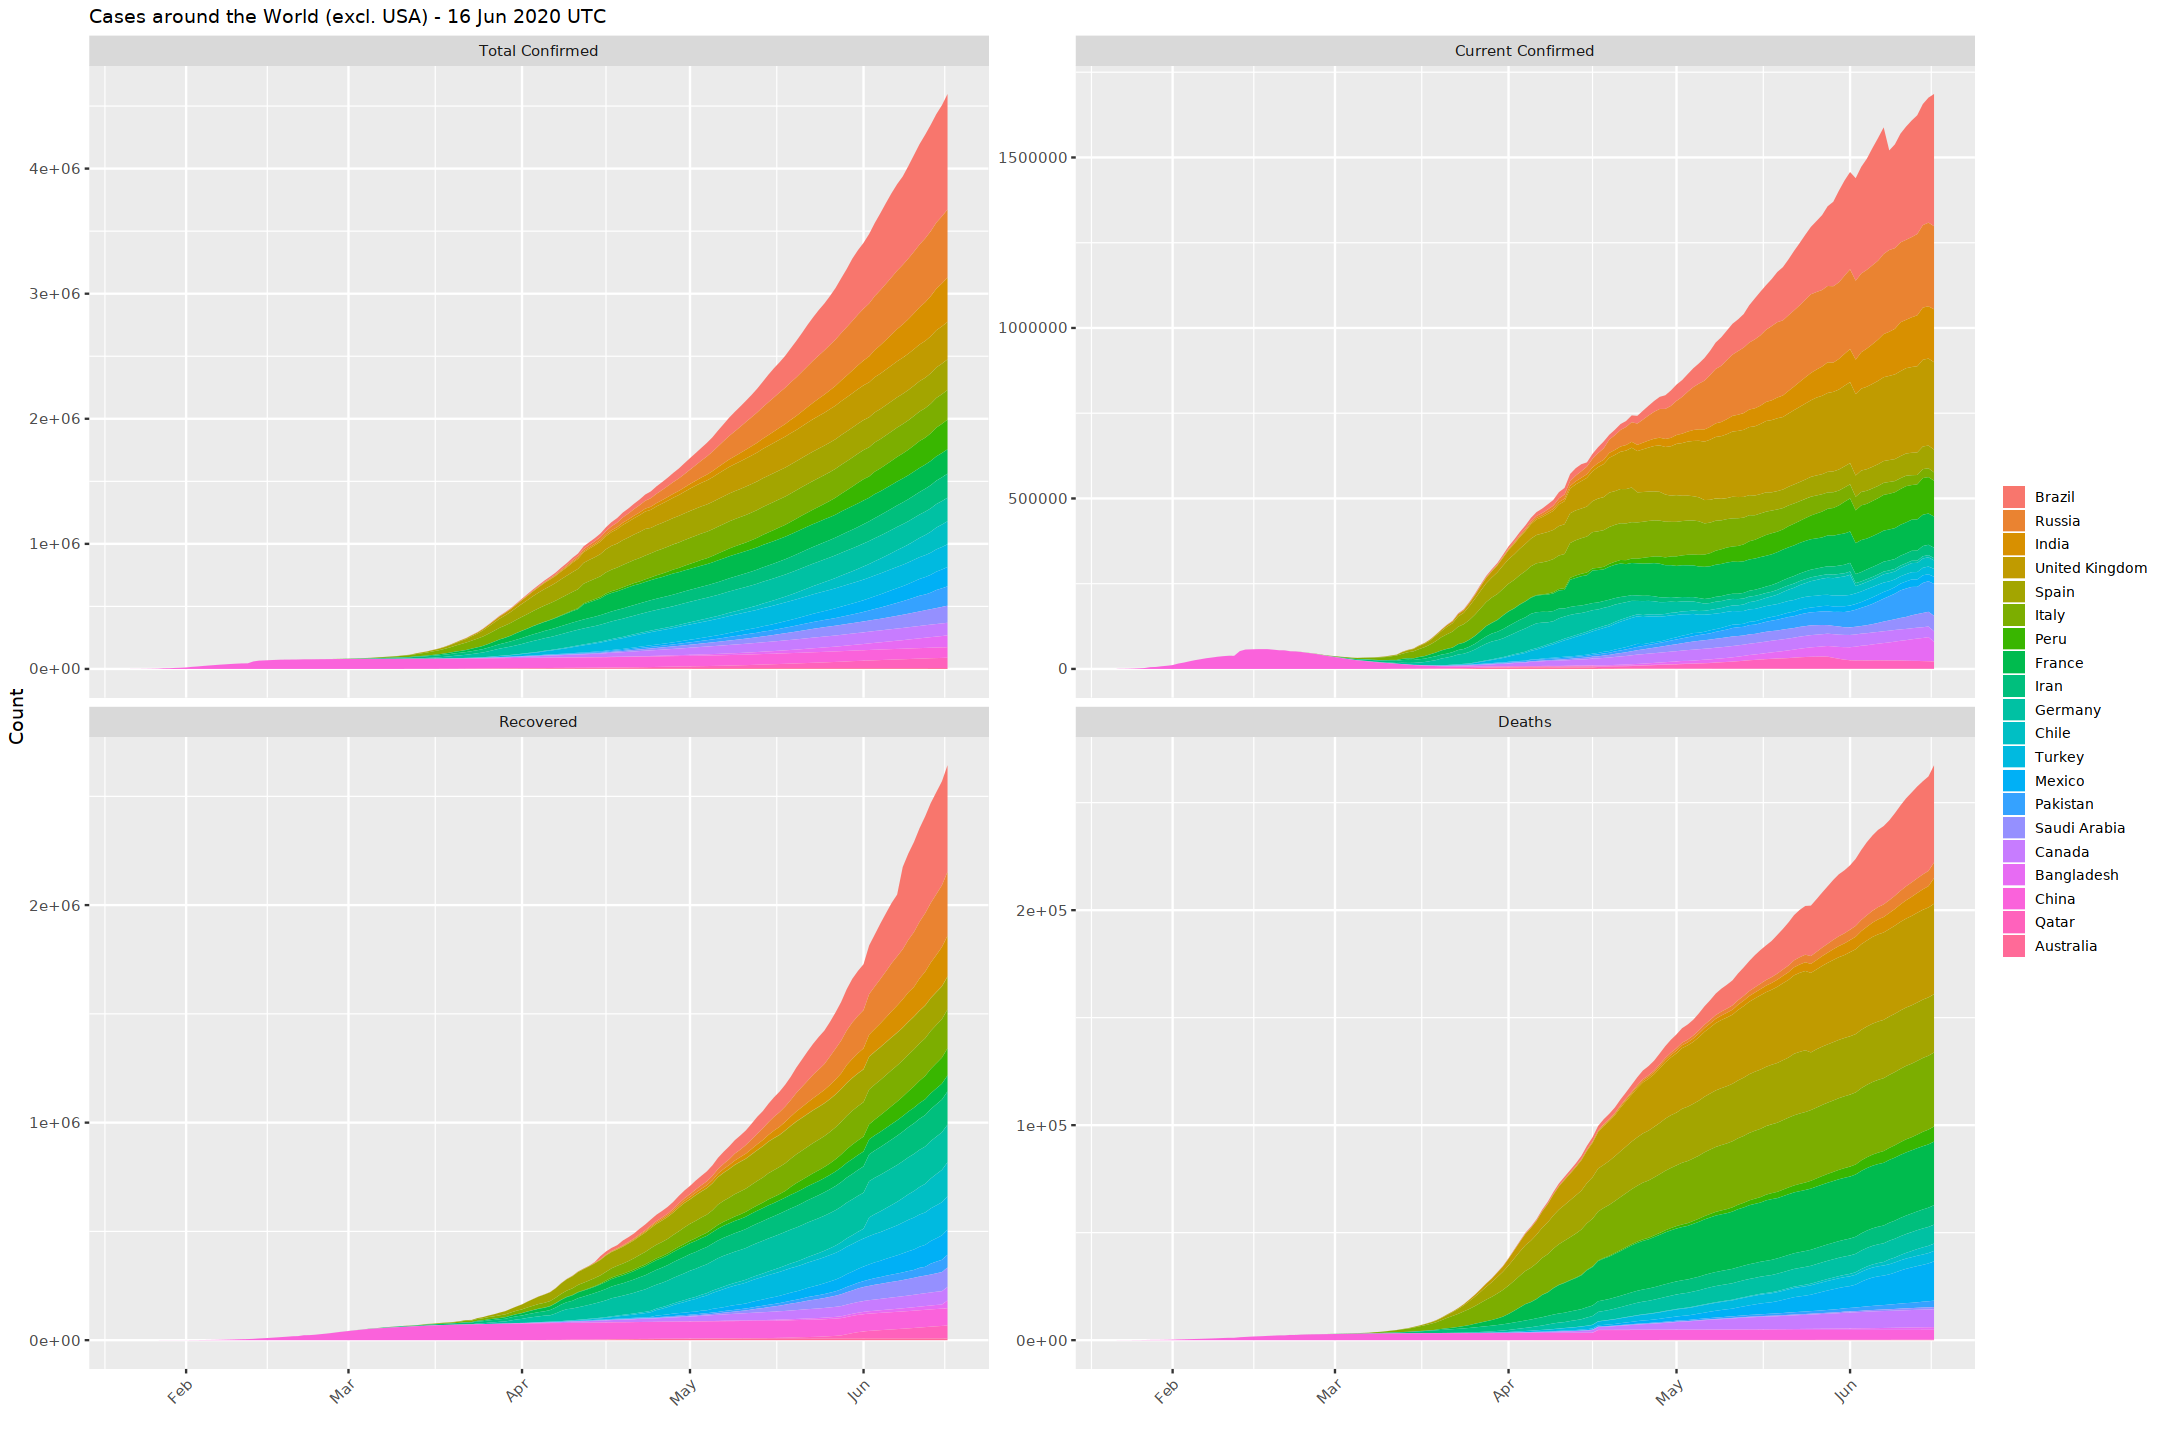

In [38]:
## plot: excluding USA
p <- df %>% filter(!(country %in% c('World', 'US'))) %>%
ggplot(aes(x=date, y=count)) + xlab('') + ylab('Count') +
theme(legend.title=element_blank(),
legend.text=element_text(size=8),
legend.key.size=unit(0.5, 'cm'),
plot.title=element_text(size=11),
axis.text.x=element_text(angle=45, hjust=1)) +
facet_wrap(~type, ncol=2, scales='free_y')
p + geom_area(aes(fill=country)) +
labs(title=paste0('Cases around the World (excl. USA) - ', max.date.txt))
fig(8,8)

If Australia is not in the top 20 Countries we add it in and remove 'Others' below

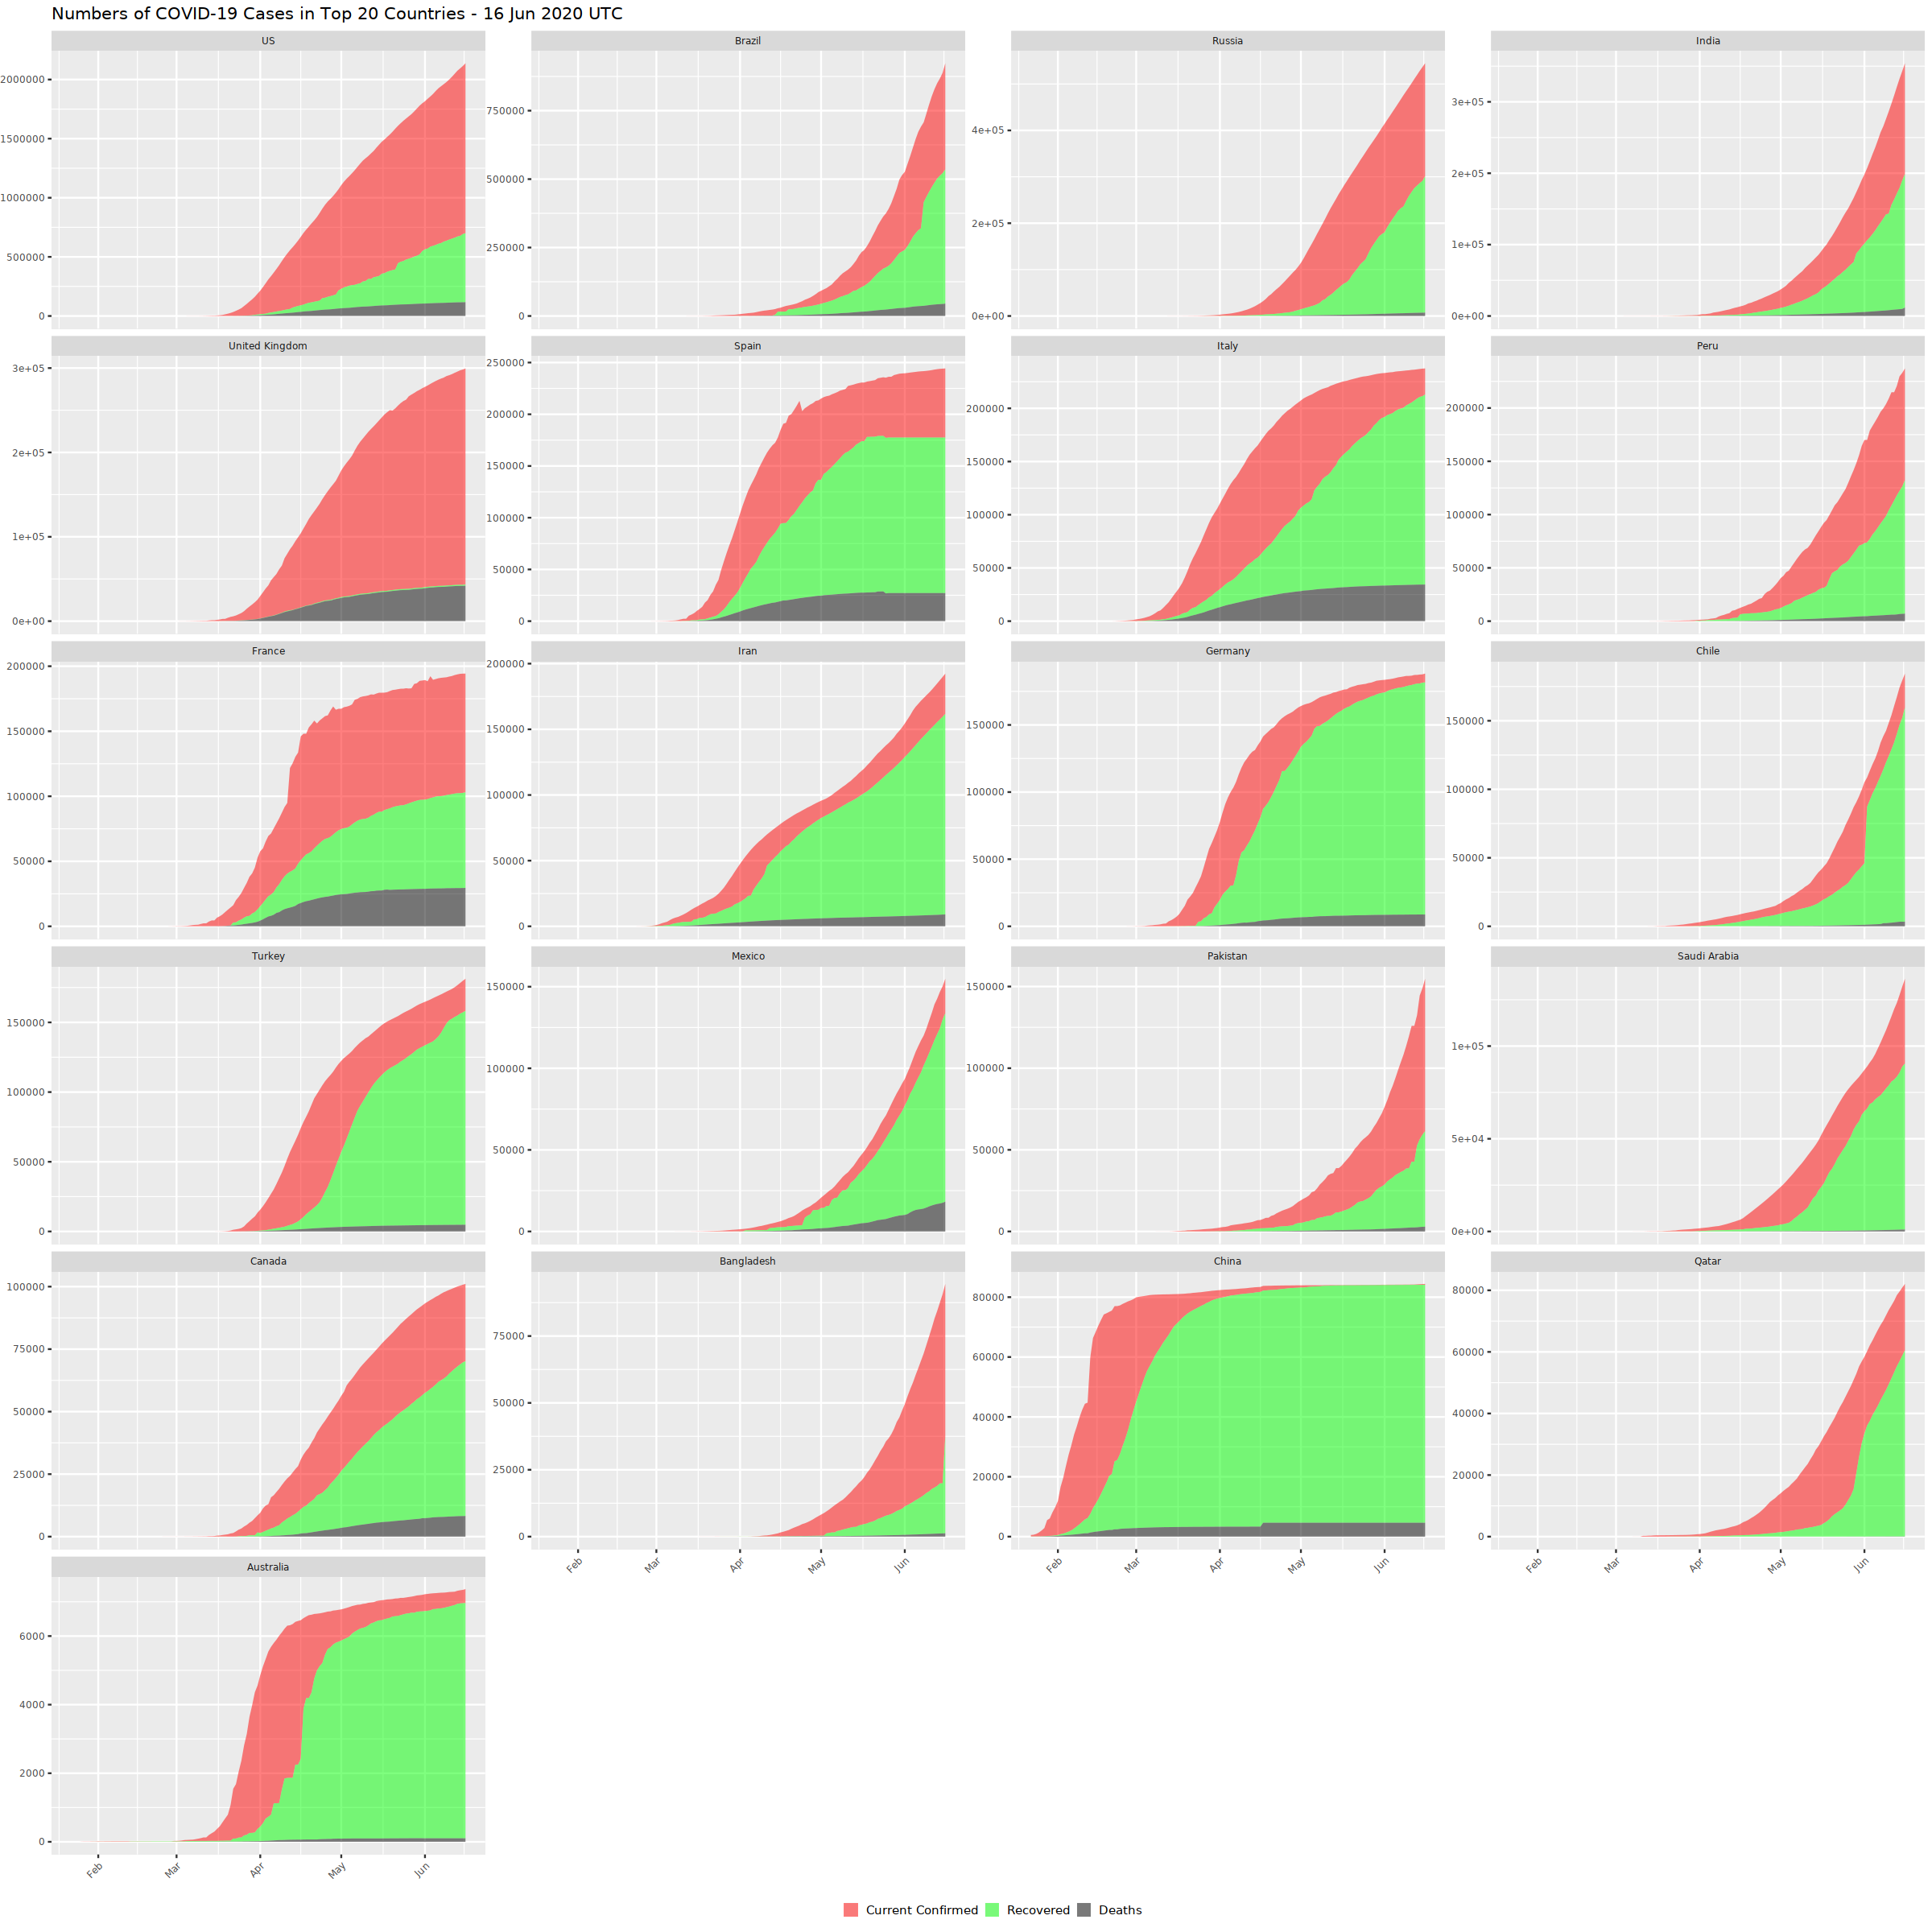

In [40]:
## add 'Australia' in top 20, remove 'Others'
if(!('Australia' %in% top.countries)) {
top.countries %<>% setdiff('Others') %>% c('Australia')
df <- data.long %>% filter(country %in% top.countries) %<>%
mutate(country=country %>% factor(levels=c(top.countries)))
}
## cases by country - area plot
df %>% filter(country != 'World' & type != 'Total Confirmed') %>%
ggplot(aes(x=date, y=count, fill=type)) +
geom_area(alpha=0.5) +
# xlab('') + ylab('') +
labs(title=paste0('Numbers of COVID-19 Cases in Top 20 Countries - ',
max.date.txt)) +
scale_fill_manual(values=c('red', 'green', 'black')) +
theme(legend.title=element_blank(), legend.position='bottom',
      plot.title = element_text(size=12),
axis.title.x=element_blank(),
axis.title.y=element_blank(),
legend.key.size=unit(0.4, 'cm'),
# legend.text=element_text(size=7),
strip.text.x=element_text(size=7),
axis.text=element_text(size=7),
axis.text.x=element_text(angle=45, hjust=1)) +
facet_wrap(~country, ncol=4, scales='free_y')
fig(20,20)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


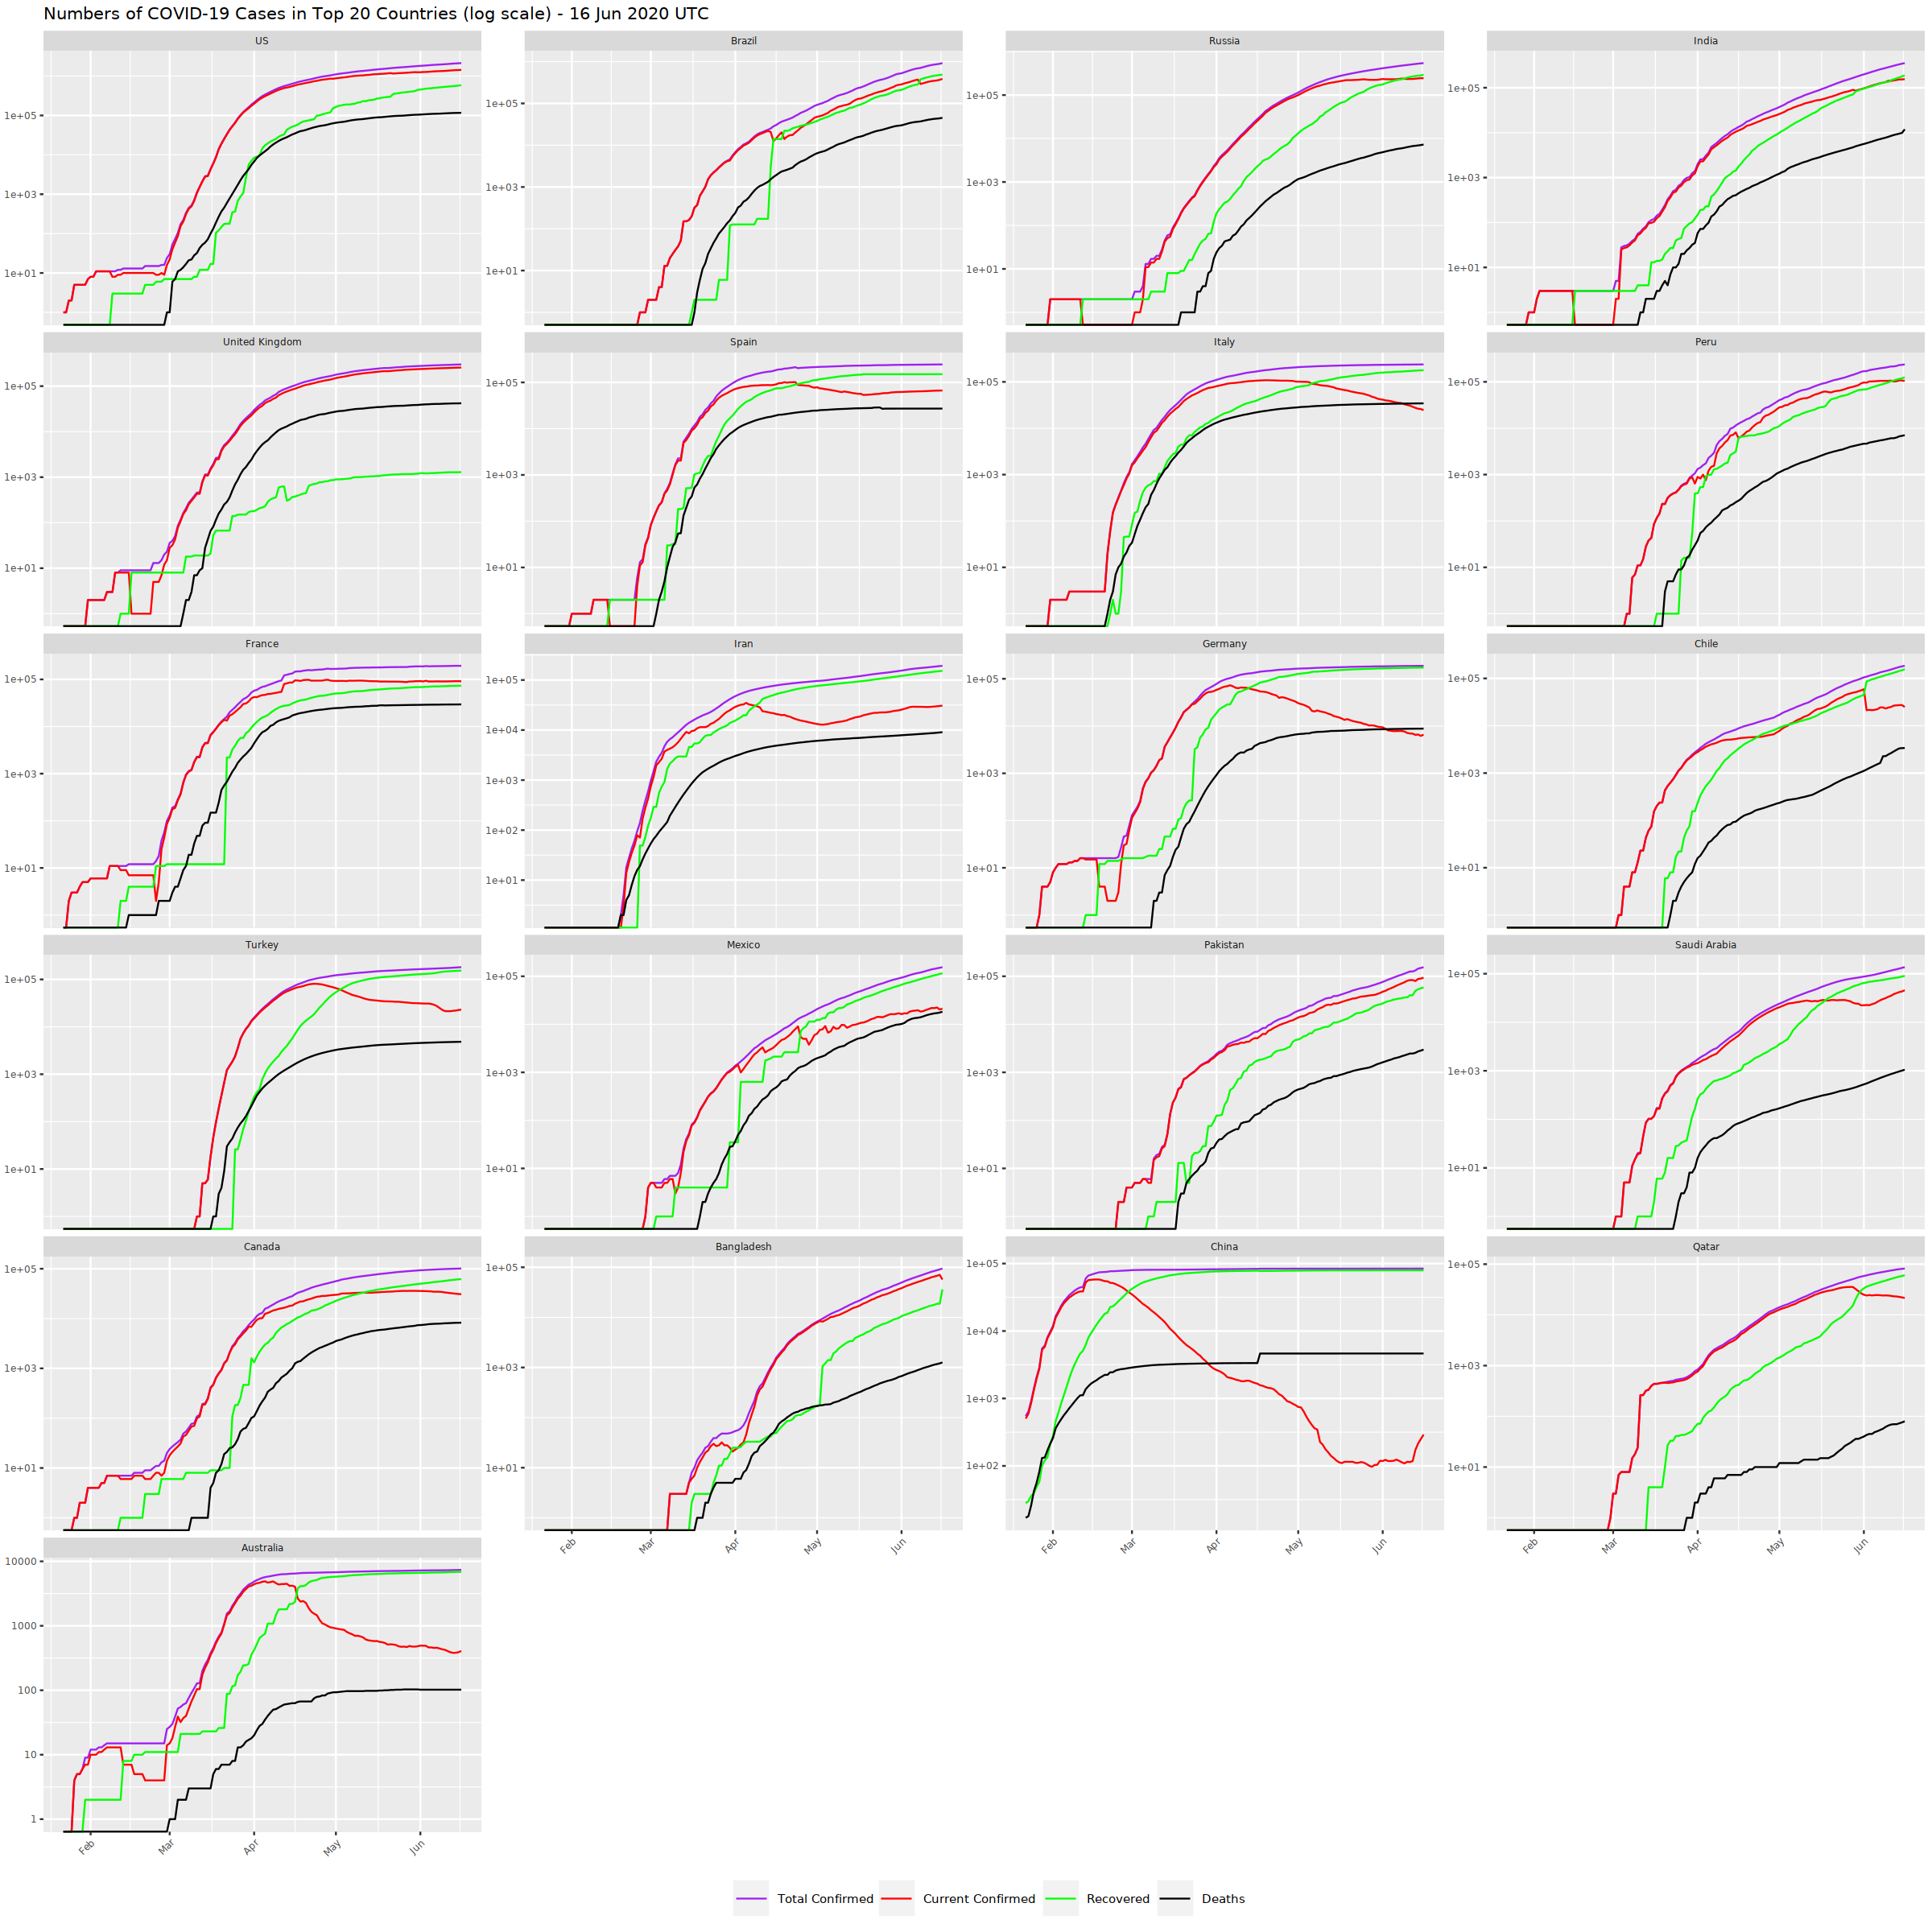

In [28]:
## cases by country - line plot - log scale
p <- df %>% filter(country != 'World') %>%
ggplot(aes(x=date, y=count, color=type)) +
geom_line() +
labs(title=paste0('Numbers of COVID-19 Cases in Top 20 Countries (log scale) - ',
max.date.txt)) +
scale_color_manual(values=c('purple', 'red', 'green', 'black')) +
theme(legend.title=element_blank(), legend.position='bottom',
plot.title = element_text(size=12),
axis.title.x=element_blank(),
axis.title.y=element_blank(),
legend.key.size=unit(1, 'cm'),
# legend.text=element_text(size=7),
strip.text.x=element_text(size=7),
axis.text=element_text(size=7),
axis.text.x=element_text(angle=45, hjust=1)) +
scale_y_continuous(trans='log10')
p + facet_wrap(~country, ncol=4, scales='free_y')
## plot over multiple pages
# p + facet_wrap_paginate(~country, nrow=4, ncol=3, page=1, scales='free_y')
# p + facet_wrap_paginate(~country, nrow=4, ncol=3, page=2, scales='free_y')
fig(20,20)

>5.3 Death Rates

Warning message:
“Removed 36 rows containing missing values (geom_path).”


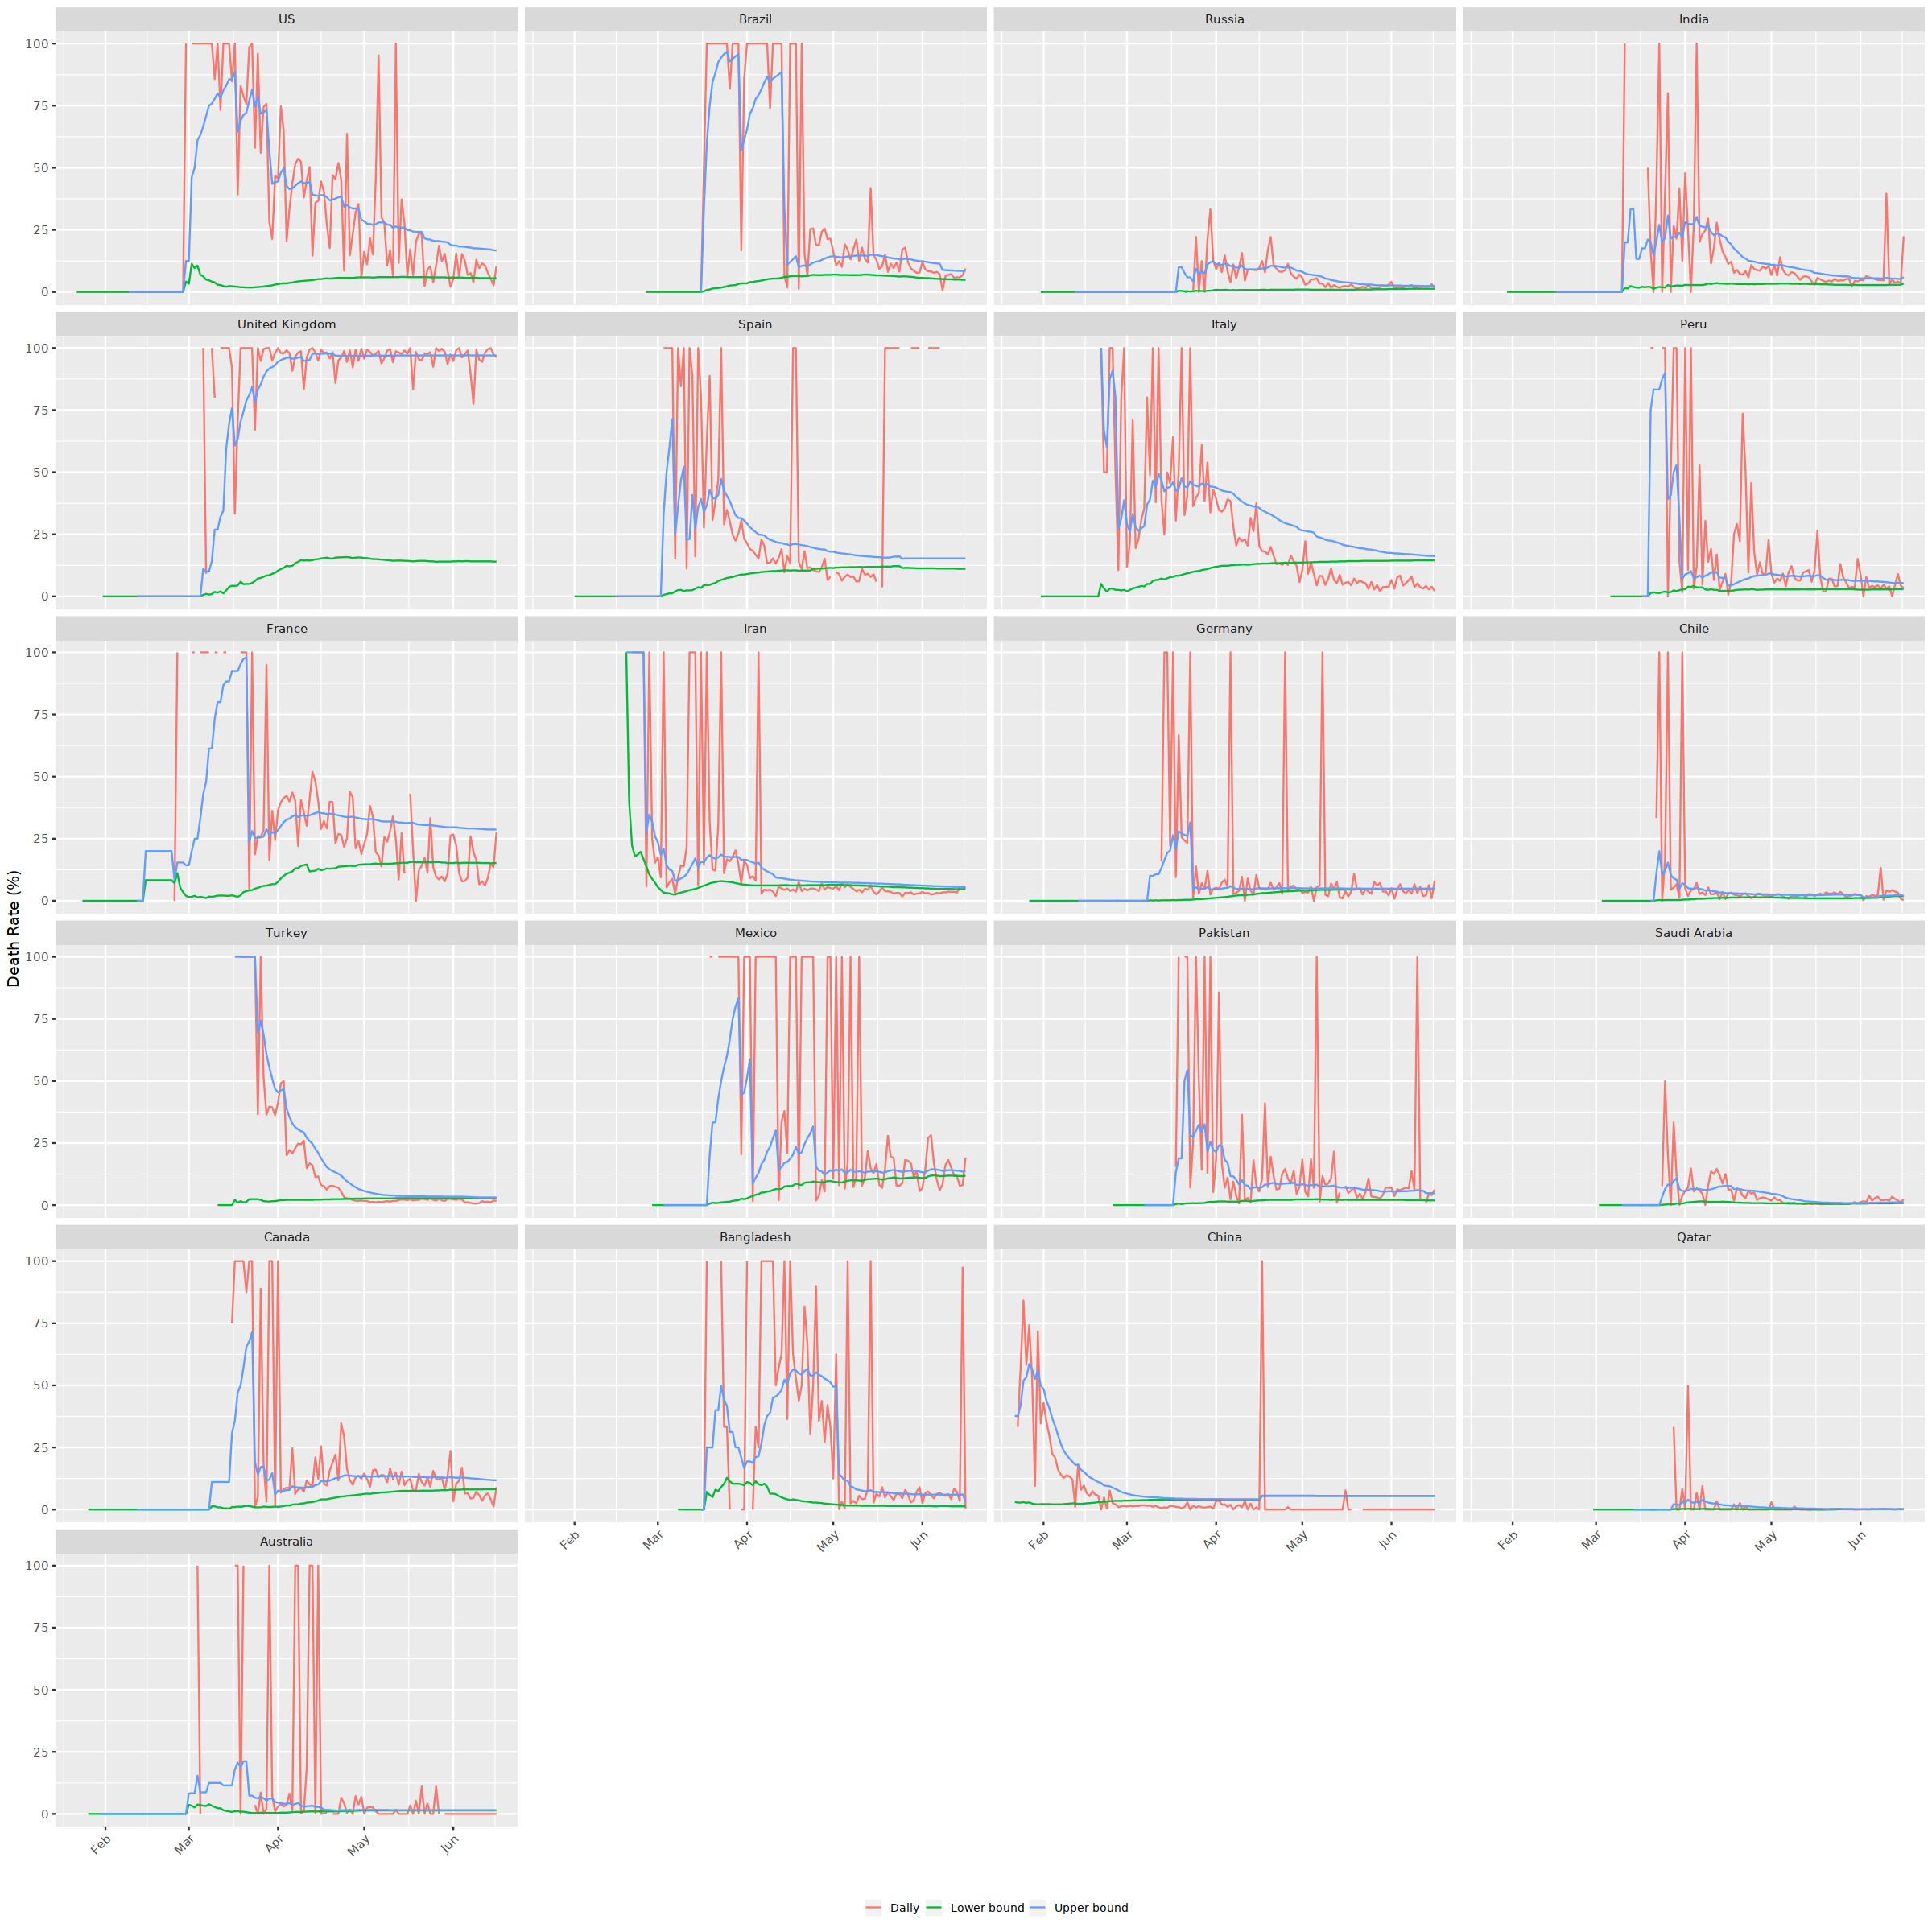

In [29]:
## three death rates
rate.max <- rates.long$count %>% max(na.rm=T)
df <- rates.long %>% filter(country %in% setdiff(top.countries, 'World')) %>%
mutate(country=factor(country, levels=top.countries))
df %>% ggplot(aes(x=date, y=count, color=type)) +
geom_line() +
xlab('') + ylab('Death Rate (%)') +
theme(legend.position='bottom', legend.title=element_blank(),
legend.text=element_text(size=8),
legend.key.size=unit(0.5, 'cm'),
axis.text.x=element_text(angle=45, hjust=1)) +
ylim(c(0, 100)) +
facet_wrap(~country, ncol=4)
